# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_rows', 150) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## User Defined Functions

In [3]:
# This function calculates total number of missing values and its percentage for each feature

def perc_miss_values (df):
    miss_number = df.isnull().sum().sort_values(ascending=False)
    miss_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    miss_values = pd.concat([miss_number, miss_percent], axis=1, keys=['Miss_Number', 'Miss_Percent'])
    return miss_values

In [2]:
# This function gives the summary of missing values and unique values for a given feature

def review_values(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

# Ingest Data  

In [4]:
df0 = pd.read_excel('World military power.xlsx',header=1)
#keep the original dataframe untouched
df = df0.copy()

# EDA

## Implement basic steps to see how is your data looks like

In [5]:
df.head().T

0               1  \
Military Strength                            Afghanistan         Albania   
Military Strength Power Index                      1.344           2.314   
Aircraft Strength                            Afghanistan         Albania   
Aircraft Strength value                          260.000          19.000   
Fighter/Interceptor Strength                 Afghanistan         Albania   
Fighter/Interceptor Strength value                 0.000           0.000   
Attack Aircraft Strength                     Afghanistan         Albania   
Attack Aircraft Strength value                    25.000           0.000   
Transport Aircraft Fleet Strength            Afghanistan         Albania   
Transport Aircraft Fleet Strength value           30.000           0.000   
Trainer Aircraft Fleet                       Afghanistan         Albania   
Trainer Aircraft Fleet value                       0.000           0.000   
Helicopter Fleet Strength                    Afghanistan         Albania   
Helicopter Fleet Strength value                  187.000          19.000   
Attack Helicopter Fleet Strength             Afghanistan         Albania   
Attack Helicopter Fleet Strength value             0.000           0.000   
Tank Strength                                Afghanistan         Albania   
Tank Strength value                                0.000           0.000   
AFV/APC Strength                             Afghanistan         Albania   
AFV/APC Strength value                          1062.000         467.000   
Self-Propelled Artillery Strength            Afghanistan         Albania   
Self-Propelled Artillery Strength value            0.000           0.000   
Towed Artillery Strength                     Afghanistan         Albania   
Towed Artillery Strength value                   176.000           0.000   
Rocket Projector Strength                    Afghanistan         Albania   
Rocket Projector Strength value                   50.000           0.000   
Navy Fleet Strengths                         Afghanistan         Albania   
Navy Fleet Strengths value                         0.000          38.000   
Aircraft Carrier Fleet Strength              Afghanistan         Albania   
Aircraft Carrier Fleet Strength value              0.000           0.000   
Submarine Fleet Strength                     Afghanistan         Albania   
Submarine Fleet Strength value                     0.000           0.000   
Destroyer Fleet Strength                     Afghanistan         Albania   
Destroyer Fleet Strength value                     0.000           0.000   
Frigate Fleet Strength                       Afghanistan         Albania   
Frigate Fleet Strength value                       0.000           0.000   
defense spending budget                      Afghanistan         Albania   
defense spending budget value            12,00,00,00,000    25,00,00,000   
External Debt                                Afghanistan         Albania   
External Debt value                       2,84,00,00,000  9,50,50,00,000   
Airport Totals                               Afghanistan         Albania   
Airport Totals value                              43.000           4.000   
Oil Production                               Afghanistan         Albania   
Oil Production value                               0.000       16000.000   
Oil Consumption                              Afghanistan         Albania   
Oil Consumption value                           5500.000       42500.000   
Proven Oil Reserves                          Afghanistan         Albania   
Proven Oil Reserves value                          0.000    16,83,00,000   
Available Manpower                           Afghanistan         Albania   
Available Manpower value                     1,43,25,743       15,19,438   
Total Population                             Afghanistan         Albania   
Total Population value                       3,49,40,837       30,57,220   
Total Square Land Area     

In [6]:
df.tail().T

133              134  \
Military Strength                                Venezuela          Vietnam   
Military Strength Power Index                        0.645            0.356   
Aircraft Strength                                Venezuela          Vietnam   
Aircraft Strength value                            260.000          293.000   
Fighter/Interceptor Strength                     Venezuela          Vietnam   
Fighter/Interceptor Strength value                  38.000           77.000   
Attack Aircraft Strength                         Venezuela          Vietnam   
Attack Aircraft Strength value                       0.000            0.000   
Transport Aircraft Fleet Strength                Venezuela          Vietnam   
Transport Aircraft Fleet Strength value             52.000           38.000   
Trainer Aircraft Fleet                           Venezuela          Vietnam   
Trainer Aircraft Fleet value                        82.000           36.000   
Helicopter Fleet Strength                        Venezuela          Vietnam   
Helicopter Fleet Strength value                     86.000          138.000   
Attack Helicopter Fleet Strength                 Venezuela          Vietnam   
Attack Helicopter Fleet Strength value              10.000           25.000   
Tank Strength                                    Venezuela          Vietnam   
Tank Strength value                                390.000         2615.000   
AFV/APC Strength                                 Venezuela          Vietnam   
AFV/APC Strength value                             600.000         2530.000   
Self-Propelled Artillery Strength                Venezuela          Vietnam   
Self-Propelled Artillery Strength value             73.000           70.000   
Towed Artillery Strength                         Venezuela          Vietnam   
Towed Artillery Strength value                     104.000         1000.000   
Rocket Projector Strength                        Venezuela          Vietnam   
Rocket Projector Strength value                     36.000           85.000   
Navy Fleet Strengths                             Venezuela          Vietnam   
Navy Fleet Strengths value                          49.000           65.000   
Aircraft Carrier Fleet Strength                  Venezuela          Vietnam   
Aircraft Carrier Fleet Strength value                0.000            0.000   
Submarine Fleet Strength                         Venezuela          Vietnam   
Submarine Fleet Strength value                       2.000            6.000   
Destroyer Fleet Strength                         Venezuela          Vietnam   
Destroyer Fleet Strength value                       0.000            0.000   
Frigate Fleet Strength                           Venezuela          Vietnam   
Frigate Fleet Strength value                         4.000            9.000   
defense spending budget                          Venezuela          Vietnam   
defense spending budget value                 74,50,00,000   5,50,00,00,000   
External Debt                                    Venezuela          Vietnam   
External Debt value                      1,00,30,00,00,000  96,58,00,00,000   
Airport Totals                                   Venezuela          Vietnam   
Airport Totals value                               444.000           45.000   
Oil Production                                   Venezuela          Vietnam   
Oil Production value                             20,07,000         2,71,400   
Oil Consumption                                  Venezuela          Vietnam   
Oil Consumption value                             5,75,000         5,25,000   
Proven Oil Reserves                              Venezuela          Vietnam   
Proven Oil Reserves value                3,00,90,00,00,000   4,40,00,00,000   
Available Manpower                               Venezuela          Vietnam   
Available Manpower value                       1,42,60,129      5,10,43,216   
Total Population          

__Remark:__ Notice that the names of the countries repeat with odd number of columns, namely, 1, 3, 5 and so on. Therefore, expect the first one all of them should be dropped.

In [6]:
df.sample(10).T

42              71   \
Military Strength                                Georgia            Mali   
Military Strength Power Index                      1.668           1.894   
Aircraft Strength                                Georgia            Mali   
Aircraft Strength value                           66.000          29.000   
Fighter/Interceptor Strength                     Georgia            Mali   
Fighter/Interceptor Strength value                 0.000           9.000   
Attack Aircraft Strength                         Georgia            Mali   
Attack Aircraft Strength value                    10.000           0.000   
Transport Aircraft Fleet Strength                Georgia            Mali   
Transport Aircraft Fleet Strength value            2.000           6.000   
Trainer Aircraft Fleet                           Georgia            Mali   
Trainer Aircraft Fleet value                      12.000           5.000   
Helicopter Fleet Strength                        Georgia            Mali   
Helicopter Fleet Strength value                   38.000           8.000   
Attack Helicopter Fleet Strength                 Georgia            Mali   
Attack Helicopter Fleet Strength value             9.000           6.000   
Tank Strength                                    Georgia            Mali   
Tank Strength value                              143.000          80.000   
AFV/APC Strength                                 Georgia            Mali   
AFV/APC Strength value                           950.000         248.000   
Self-Propelled Artillery Strength                Georgia            Mali   
Self-Propelled Artillery Strength value           69.000           0.000   
Towed Artillery Strength                         Georgia            Mali   
Towed Artillery Strength value                   133.000          50.000   
Rocket Projector Strength                        Georgia            Mali   
Rocket Projector Strength value                   51.000          32.000   
Navy Fleet Strengths                             Georgia             NaN   
Navy Fleet Strengths value                         9.000             NaN   
Aircraft Carrier Fleet Strength                  Georgia             NaN   
Aircraft Carrier Fleet Strength value              0.000             NaN   
Submarine Fleet Strength                         Georgia             NaN   
Submarine Fleet Strength value                     0.000             NaN   
Destroyer Fleet Strength                         Georgia             NaN   
Destroyer Fleet Strength value                     0.000             NaN   
Frigate Fleet Strength                           Georgia             NaN   
Frigate Fleet Strength value                       0.000             NaN   
defense spending budget                          Georgia            Mali   
defense spending budget value               32,70,00,000     7,00,00,000   
External Debt                                    Georgia            Mali   
External Debt value                      16,99,00,00,000  4,19,20,00,000   
Airport Totals                                   Georgia            Mali   
Airport Totals value                              22.000          25.000   
Oil Production                                   Georgia            Mali   
Oil Production value                             400.000           0.000   
Oil Consumption                                  Georgia            Mali   
Oil Consumption value                          18500.000        5500.000   
Proven Oil Reserves                              Georgia            Mali   
Proven Oil Reserves value                    3,50,00,000           0.000   
Available Manpower                               Georgia            Mali   
Available Manpower value                       22,49,744       59,91,557   
Total Population                                 Georgia            Mali   
Total Population value                         49,26,087     1,84,29,893   
Total Square Land Area   

In [7]:
#column names should be converted into useful format
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [8]:
from skimpy import clean_columns
#notice that clean_columns takes dataframe and returns a dataframe with manipulated column names
proper_column_names=clean_columns(pd.DataFrame(data=[],columns=df.columns)).columns
#reassign column names
df.columns=proper_column_names
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter_interceptor_strength', 'fighter_interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv_apc_strength', 'afv_apc_strength_value',
       'self_propelled_artillery_strength',
       'self_propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [9]:
df.shape

(138, 60)

## Convert multi index columns to one level

Let us set the first column of country names as indices

In [10]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

In [11]:
df.set_index('country', inplace=True)

In [12]:
df.head()

military_strength_power_index aircraft_strength  \
country                                                        
Afghanistan                          1.344       Afghanistan   
Albania                              2.314           Albania   
Algeria                              0.466           Algeria   
Angola                               0.838            Angola   
Argentina                            0.652         Argentina   

             aircraft_strength_value fighter_interceptor_strength  \
country                                                             
Afghanistan                  260.000                  Afghanistan   
Albania                       19.000                      Albania   
Algeria                      551.000                      Algeria   
Angola                       295.000                       Angola   
Argentina                    227.000                    Argentina   

             fighter_interceptor_strength_value attack_aircraft_strength  \
country                                                                    
Afghanistan                               0.000              Afghanistan   
Albania                                   0.000                  Albania   
Algeria                                 103.000                  Algeria   
Angola                                   72.000                   Angola   
Argentina                                24.000                Argentina   

             attack_aircraft_strength_value transport_aircraft_fleet_strength  \
country                                                                         
Afghanistan                          25.000                       Afghanistan   
Albania                               0.000                           Albania   
Algeria                              22.000                           Algeria   
Angola                               18.000                            Angola   
Argentina                             7.000                         Argentina   

             transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
country                                                                       
Afghanistan                                   30.000            Afghanistan   
Albania                                        0.000                Albania   
Algeria                                       59.000                Algeria   
Angola                                        30.000                 Angola   
Argentina                                      9.000              Argentina   

             trainer_aircraft_fleet_value helicopter_fleet_strength  \
country                                                               
Afghanistan                         0.000               Afghanistan   
Albania                             0.000                   Albania   
Algeria                            87.000                   Algeria   
Angola                             47.000                    Angola   
Argentina                          64.000                 Argentina   

             helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
country                                                                         
Afghanistan                          187.000                      Afghanistan   
Albania                               19.000                          Albania   
Algeria                              257.000                          Algeria   
Angola                               126.000                           Angola   
Argentina                            100.000                        Argentina   

             attack_helicopter_fleet_strength_value tank_strength  \
country                                                             
Afghanistan                                   0.000   Afghanistan   
Albania                                       0.000       Albania   
Algeria                                      45.000       Algeria   
Angola        

## Detect and drop duplicated columns

In [13]:
#drop 2nd, 4th, 6th etc number of columns
index=0
for col in df.columns:
    if index % 2 == 1:
        df.drop(col, axis=1, inplace=True)
    index=index+1

In [14]:
#all duplicated columns are dropped
df.head().T

country                                      Afghanistan         Albania  \
military_strength_power_index                      1.344           2.314   
aircraft_strength_value                          260.000          19.000   
fighter_interceptor_strength_value                 0.000           0.000   
attack_aircraft_strength_value                    25.000           0.000   
transport_aircraft_fleet_strength_value           30.000           0.000   
trainer_aircraft_fleet_value                       0.000           0.000   
helicopter_fleet_strength_value                  187.000          19.000   
attack_helicopter_fleet_strength_value             0.000           0.000   
tank_strength_value                                0.000           0.000   
afv_apc_strength_value                          1062.000         467.000   
self_propelled_artillery_strength_value            0.000           0.000   
towed_artillery_strength_value                   176.000           0.000   
rocket_projector_strength_value                   50.000           0.000   
navy_fleet_strengths_value                         0.000          38.000   
aircraft_carrier_fleet_strength_value              0.000           0.000   
submarine_fleet_strength_value                     0.000           0.000   
destroyer_fleet_strength_value                     0.000           0.000   
frigate_fleet_strength_value                       0.000           0.000   
defense_spending_budget_value            12,00,00,00,000    25,00,00,000   
external_debt_value                       2,84,00,00,000  9,50,50,00,000   
airport_totals_value                              43.000           4.000   
oil_production_value                               0.000       16000.000   
oil_consumption_value                           5500.000       42500.000   
proven_oil_reserves_value                          0.000    16,83,00,000   
available_manpower_value                     1,43,25,743       15,19,438   
total_population_value                       3,49,40,837       30,57,220   
total_square_land_area_value                    6,52,230       28748.000   
total_coastline_coverage_value                     0.000         362.000   
total_waterway_coverage_value                   1200.000          41.000   
total_border_coverage_value                     5987.000         691.000   

country                                          Algeria           Angola  \
military_strength_power_index                      0.466            0.838   
aircraft_strength_value                          551.000          295.000   
fighter_interceptor_strength_value               103.000           72.000   
attack_aircraft_strength_value                    22.000           18.000   
transport_aircraft_fleet_strength_value           59.000           30.000   
trainer_aircraft_fleet_value                      87.000           47.000   
helicopter_fleet_strength_value                  257.000          126.000   
attack_helicopter_fleet_strength_value            45.000           15.000   
tank_strength_value                              880.000          379.000   
afv_apc_strength_value                          7361.000          595.000   
self_propelled_artillery_strength_value          320.000           28.000   
towed_artillery_strength_value                   240.000          357.000   
rocket_projector_strength_value                  316.000          115.000   
navy_fleet_strengths_value                       201.000           57.000   
aircraft_carrier_fleet_strength_value              0.000            0.000   
submarine_fleet_strength_value                     6.000            0.000   
destroyer_fleet_strength_value                     0.000            0.000   
frigate_fleet_strength_value                       5.000            0.000   
defense_spending_budget_value            13,00,00,00,000   7,00,00,00,000   
external_debt_value                       6,26,00,00,000  42,08,00,00,000   
airport_totals_value      

In [15]:
#there is no duplicated rows
df.duplicated().sum()

0

In [16]:
df.shape

(138, 30)

## Check for missing values 

In [17]:
perc_miss_values(df)

Miss_Number  Miss_Percent
total_coastline_coverage_value                    29         0.210
submarine_fleet_strength_value                    23         0.167
frigate_fleet_strength_value                      23         0.167
destroyer_fleet_strength_value                    23         0.167
aircraft_carrier_fleet_strength_value             23         0.167
navy_fleet_strengths_value                        14         0.101
total_border_coverage_value                        9         0.065
attack_helicopter_fleet_strength_value             0         0.000
external_debt_value                                0         0.000
total_waterway_coverage_value                      0         0.000
fighter_interceptor_strength_value                 0         0.000
total_square_land_area_value                       0         0.000
total_population_value                             0         0.000
available_manpower_value                           0         0.000
proven_oil_reserves_value                          0         0.000
oil_consumption_value                              0         0.000
oil_production_value                               0         0.000
airport_totals_value                               0         0.000
defense_spending_budget_value                      0         0.000
tank_strength_value                                0         0.000
attack_aircraft_strength_value                     0         0.000
transport_aircraft_fleet_strength_value            0         0.000
aircraft_strength_value                            0         0.000
trainer_aircraft_fleet_value                       0         0.000
helicopter_fleet_strength_value                    0         0.000
rocket_projector_strength_value                    0         0.000
towed_artillery_strength_value                     0         0.000
self_propelled_artillery_strength_value            0         0.000
afv_apc_strength_value                             0         0.000
military_strength_power_index                      0         0.000

Seven columns have missing values.

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [18]:
df[df.isna().any(axis=1)].T

country                                          Armenia           Australia  \
military_strength_power_index                      2.125               0.323   
aircraft_strength_value                           64.000             464.000   
fighter_interceptor_strength_value                 0.000              82.000   
attack_aircraft_strength_value                     9.000               6.000   
transport_aircraft_fleet_strength_value            3.000              38.000   
trainer_aircraft_fleet_value                      13.000             174.000   
helicopter_fleet_strength_value                   37.000             133.000   
attack_helicopter_fleet_strength_value            20.000              22.000   
tank_strength_value                              110.000              59.000   
afv_apc_strength_value                           748.000            3051.000   
self_propelled_artillery_strength_value           38.000               0.000   
towed_artillery_strength_value                   150.000              54.000   
rocket_projector_strength_value                   68.000               0.000   
navy_fleet_strengths_value                         0.000              48.000   
aircraft_carrier_fleet_strength_value                NaN               2.000   
submarine_fleet_strength_value                       NaN               6.000   
destroyer_fleet_strength_value                       NaN               2.000   
frigate_fleet_strength_value                         NaN               8.000   
defense_spending_budget_value             1,38,50,00,000     26,30,00,00,000   
external_debt_value                      10,41,00,00,000  17,14,00,00,00,000   
airport_totals_value                              11.000             480.000   
oil_production_value                               0.000            2,63,000   
oil_consumption_value                          47500.000           10,05,000   
proven_oil_reserves_value                          0.000      1,82,10,00,000   
available_manpower_value                       16,96,085         1,08,08,002   
total_population_value                         30,38,217         2,34,70,145   
total_square_land_area_value                   29743.000           77,41,220   
total_coastline_coverage_value                       NaN           25760.000   
total_waterway_coverage_value                      0.000            2000.000   
total_border_coverage_value                     1570.000                 NaN   

country                                            Austria          Bahrain  \
military_strength_power_index                        0.957            1.855   
aircraft_strength_value                            120.000          109.000   
fighter_interceptor_strength_value                  15.000           17.000   
attack_aircraft_strength_value                       0.000            0.000   
transport_aircraft_fleet_strength_value             11.000            2.000   
trainer_aircraft_fleet_value                        32.000           37.000   
helicopter_fleet_strength_value                     62.000           65.000   
attack_helicopter_fleet_strength_value               0.000           22.000   
tank_strength_value                                 56.000          180.000   
afv_apc_strength_value                             467.000          843.000   
self_propelled_artillery_strength_value             33.000           33.000   
towed_artillery_strength_value                       0.000           26.000   
rocket_projector_strength_value                      0.000           17.000   
navy_fleet_strengths_value                           0.000           39.000   
aircraft_carrier_fleet_strength_value                  NaN            0.000   
submarine_fleet_strength_value                         NaN            0.000   
destroyer_fleet_strength_value                         NaN            0.000   
frigate_fleet_strength_value                           NaN            1.000   
defense_spending_b

Missing values for __total_coastline_coverage_value__

The following countries have no coast. So, the values are set to zero.

In [19]:
df[(df['total_coastline_coverage_value'].isnull())].index

Index(['Armenia', 'Austria', 'Belarus', 'Bhutan', 'Bolivia', 'Botswana',
       'Burkina Faso', 'Central African Republic', 'Chad', 'Czechia',
       'Ethiopia', 'Hungary', 'Kyrgyzstan', 'Laos', 'Mali', 'Moldova',
       'Mongolia', 'Nepal', 'Niger', 'North Macedonia', 'Paraguay', 'Serbia',
       'Slovakia', 'South Sudan', 'Switzerland', 'Tajikistan', 'Uganda',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='country')

In [20]:
df.loc[(df['total_coastline_coverage_value'].isnull()), 'total_coastline_coverage_value']=0

In [21]:
#now there is no null values in column of 'total_coastline_coverage_value'
review_values('total_coastline_coverage_value')

column name    :  total_coastline_coverage_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  104
0.000       30
26.000       2
193.000      2
400.000      2
853.000      2
            ..
2389.000     1
310.000      1
885.000      1
4853.000     1
1906.000     1
Name: total_coastline_coverage_value, Length: 104, dtype: int64


Missing values for __total_border_coverage_value__

The following countries are islands and have no borderline with another country. So, let us set to zero.

In [22]:
df[(df['total_border_coverage_value'].isnull())].index

Index(['Australia', 'Bahrain', 'Japan', 'Madagascar', 'New Zealand',
       'Philippines', 'Singapore', 'Sri Lanka', 'Taiwan'],
      dtype='object', name='country')

In [23]:
df.loc[(df['total_border_coverage_value'].isnull()), 'total_border_coverage_value']=0

In [24]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('total_border_coverage_value')

column name    :  total_border_coverage_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  126
0.000       9
443.000     2
1667.000    2
2237.000    2
2363.000    2
           ..
4072.000    1
2563.000    1
5925.000    1
657.000     1
3229.000    1
Name: total_border_coverage_value, Length: 126, dtype: int64


Missing values for __submarine_fleet_strength_value__

Except South Korea, all acountries have no submarine and South Korea has 22 submarines.

In [25]:
df[(df['submarine_fleet_strength_value'].isnull())].index

Index(['Armenia', 'Austria', 'Belarus', 'Bhutan', 'Botswana', 'Burkina Faso',
       'Central African Republic', 'Chad', 'Czechia', 'Ethiopia', 'Hungary',
       'Kyrgyzstan', 'Mali', 'Moldova', 'Mongolia', 'Nepal', 'Niger',
       'North Macedonia', 'Slovakia', 'South Korea', 'Switzerland',
       'Tajikistan', 'Uzbekistan'],
      dtype='object', name='country')

In [26]:
df.loc['South Korea', 'submarine_fleet_strength_value']=22
df.loc[(df['submarine_fleet_strength_value'].isnull()), 'submarine_fleet_strength_value']=0

In [27]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('submarine_fleet_strength_value')

column name    :  submarine_fleet_strength_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  20
0.000     96
2.000      6
6.000      6
4.000      5
5.000      4
8.000      3
3.000      3
11.000     2
22.000     2
83.000     1
10.000     1
12.000     1
62.000     1
34.000     1
1.000      1
20.000     1
16.000     1
9.000      1
74.000     1
66.000     1
Name: submarine_fleet_strength_value, dtype: int64


Missing values for __frigate_fleet_strength_value__

Except South Korea, all acountries have no frigate and South Korea has 18 frigates.

In [28]:
df[(df['frigate_fleet_strength_value'].isnull())].index

Index(['Armenia', 'Austria', 'Belarus', 'Bhutan', 'Botswana', 'Burkina Faso',
       'Central African Republic', 'Chad', 'Czechia', 'Ethiopia', 'Hungary',
       'Kyrgyzstan', 'Mali', 'Moldova', 'Mongolia', 'Nepal', 'Niger',
       'North Macedonia', 'Slovakia', 'South Korea', 'Switzerland',
       'Tajikistan', 'Uzbekistan'],
      dtype='object', name='country')

In [29]:
df.loc['South Korea', 'frigate_fleet_strength_value']=18
df.loc[(df['frigate_fleet_strength_value'].isnull()), 'frigate_fleet_strength_value']=0

In [30]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('frigate_fleet_strength_value')

column name    :  frigate_fleet_strength_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  18
0.000     83
2.000      8
7.000      6
4.000      6
1.000      5
9.000      4
5.000      3
11.000     3
13.000     3
6.000      3
3.000      3
8.000      2
12.000     2
10.000     2
18.000     2
22.000     1
52.000     1
16.000     1
Name: frigate_fleet_strength_value, dtype: int64


Missing values for __destroyer_fleet_strength_value__

Except South Korea, all acountries have no frigate and South Korea has 12 destroyers.

In [31]:
df[(df['destroyer_fleet_strength_value'].isnull())].index

Index(['Armenia', 'Austria', 'Belarus', 'Bhutan', 'Botswana', 'Burkina Faso',
       'Central African Republic', 'Chad', 'Czechia', 'Ethiopia', 'Hungary',
       'Kyrgyzstan', 'Mali', 'Moldova', 'Mongolia', 'Nepal', 'Niger',
       'North Macedonia', 'Slovakia', 'South Korea', 'Switzerland',
       'Tajikistan', 'Uzbekistan'],
      dtype='object', name='country')

In [32]:
df.loc['South Korea', 'destroyer_fleet_strength_value']=12
df.loc[(df['destroyer_fleet_strength_value'].isnull()), 'destroyer_fleet_strength_value']=0

In [33]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('destroyer_fleet_strength_value')

column name    :  destroyer_fleet_strength_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
0.000     125
4.000       3
12.000      2
2.000       1
36.000      1
11.000      1
10.000      1
40.000      1
16.000      1
6.000       1
91.000      1
Name: destroyer_fleet_strength_value, dtype: int64


Missing values for __aircraft_carrier_fleet_strength_value__

All acountries have no aircraft carrier and let us all to zero

In [34]:
df[(df['aircraft_carrier_fleet_strength_value'].isnull())].index

Index(['Armenia', 'Austria', 'Belarus', 'Bhutan', 'Botswana', 'Burkina Faso',
       'Central African Republic', 'Chad', 'Czechia', 'Ethiopia', 'Hungary',
       'Kyrgyzstan', 'Mali', 'Moldova', 'Mongolia', 'Nepal', 'Niger',
       'North Macedonia', 'Slovakia', 'South Korea', 'Switzerland',
       'Tajikistan', 'Uzbekistan'],
      dtype='object', name='country')

In [35]:
df.loc[(df['aircraft_carrier_fleet_strength_value'].isnull()), 'aircraft_carrier_fleet_strength_value']=0

In [36]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('aircraft_carrier_fleet_strength_value')

column name    :  aircraft_carrier_fleet_strength_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5
0.000     125
2.000       6
1.000       4
4.000       2
20.000      1
Name: aircraft_carrier_fleet_strength_value, dtype: int64


Missing values for __navy_fleet_strengths_value__

All countries above have power of navy fleet and let us all to zero.

In [37]:
df[(df['navy_fleet_strengths_value'].isnull())].index

Index(['Botswana', 'Burkina Faso', 'Central African Republic', 'Chad',
       'Czechia', 'Ethiopia', 'Hungary', 'Kyrgyzstan', 'Mali', 'Moldova',
       'Mongolia', 'Nepal', 'Niger', 'North Macedonia'],
      dtype='object', name='country')

In [38]:
df.loc[(df['navy_fleet_strengths_value'].isnull()), 'navy_fleet_strengths_value']=0

In [39]:
#now there is no null values in column of 'total_border_coverage_value'
review_values('navy_fleet_strengths_value')

column name    :  navy_fleet_strengths_value
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  78
0.000      28
8.000       5
19.000      4
20.000      4
30.000      3
           ..
37.000      1
15.000      1
36.000      1
39.000      1
490.000     1
Name: navy_fleet_strengths_value, Length: 78, dtype: int64


Let us check again missing values.

In [40]:
#There is no remaining missing values.
perc_miss_values(df)

Miss_Number  Miss_Percent
military_strength_power_index                      0         0.000
aircraft_strength_value                            0         0.000
total_waterway_coverage_value                      0         0.000
total_coastline_coverage_value                     0         0.000
total_square_land_area_value                       0         0.000
total_population_value                             0         0.000
available_manpower_value                           0         0.000
proven_oil_reserves_value                          0         0.000
oil_consumption_value                              0         0.000
oil_production_value                               0         0.000
airport_totals_value                               0         0.000
external_debt_value                                0         0.000
defense_spending_budget_value                      0         0.000
frigate_fleet_strength_value                       0         0.000
destroyer_fleet_strength_value                     0         0.000
submarine_fleet_strength_value                     0         0.000
aircraft_carrier_fleet_strength_value              0         0.000
navy_fleet_strengths_value                         0         0.000
rocket_projector_strength_value                    0         0.000
towed_artillery_strength_value                     0         0.000
self_propelled_artillery_strength_value            0         0.000
afv_apc_strength_value                             0         0.000
tank_strength_value                                0         0.000
attack_helicopter_fleet_strength_value             0         0.000
helicopter_fleet_strength_value                    0         0.000
trainer_aircraft_fleet_value                       0         0.000
transport_aircraft_fleet_strength_value            0         0.000
attack_aircraft_strength_value                     0         0.000
fighter_interceptor_strength_value                 0         0.000
total_border_coverage_value                        0         0.000

## Fix the dtypes

Let us check data types:

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength_power_index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    float64
 2   fighter_interceptor_strength_value       138 non-null    float64
 3   attack_aircraft_strength_value           138 non-null    float64
 4   transport_aircraft_fleet_strength_value  138 non-null    float64
 5   trainer_aircraft_fleet_value             138 non-null    float64
 6   helicopter_fleet_strength_value          138 non-null    float64
 7   attack_helicopter_fleet_strength_value   138 non-null    float64
 8   tank_strength_value                      138 non-null    float64
 9   afv_apc_strength_value                   138 non-null    float64
 10  self_propelled_artillery_strength_value 

Although all columns should be numeric, but some columns are not float types. Let us observe the values.

In [42]:
df.head().T

country                                      Afghanistan         Albania  \
military_strength_power_index                      1.344           2.314   
aircraft_strength_value                          260.000          19.000   
fighter_interceptor_strength_value                 0.000           0.000   
attack_aircraft_strength_value                    25.000           0.000   
transport_aircraft_fleet_strength_value           30.000           0.000   
trainer_aircraft_fleet_value                       0.000           0.000   
helicopter_fleet_strength_value                  187.000          19.000   
attack_helicopter_fleet_strength_value             0.000           0.000   
tank_strength_value                                0.000           0.000   
afv_apc_strength_value                          1062.000         467.000   
self_propelled_artillery_strength_value            0.000           0.000   
towed_artillery_strength_value                   176.000           0.000   
rocket_projector_strength_value                   50.000           0.000   
navy_fleet_strengths_value                         0.000          38.000   
aircraft_carrier_fleet_strength_value              0.000           0.000   
submarine_fleet_strength_value                     0.000           0.000   
destroyer_fleet_strength_value                     0.000           0.000   
frigate_fleet_strength_value                       0.000           0.000   
defense_spending_budget_value            12,00,00,00,000    25,00,00,000   
external_debt_value                       2,84,00,00,000  9,50,50,00,000   
airport_totals_value                              43.000           4.000   
oil_production_value                               0.000       16000.000   
oil_consumption_value                           5500.000       42500.000   
proven_oil_reserves_value                          0.000    16,83,00,000   
available_manpower_value                     1,43,25,743       15,19,438   
total_population_value                       3,49,40,837       30,57,220   
total_square_land_area_value                    6,52,230       28748.000   
total_coastline_coverage_value                     0.000         362.000   
total_waterway_coverage_value                   1200.000          41.000   
total_border_coverage_value                     5987.000         691.000   

country                                          Algeria           Angola  \
military_strength_power_index                      0.466            0.838   
aircraft_strength_value                          551.000          295.000   
fighter_interceptor_strength_value               103.000           72.000   
attack_aircraft_strength_value                    22.000           18.000   
transport_aircraft_fleet_strength_value           59.000           30.000   
trainer_aircraft_fleet_value                      87.000           47.000   
helicopter_fleet_strength_value                  257.000          126.000   
attack_helicopter_fleet_strength_value            45.000           15.000   
tank_strength_value                              880.000          379.000   
afv_apc_strength_value                          7361.000          595.000   
self_propelled_artillery_strength_value          320.000           28.000   
towed_artillery_strength_value                   240.000          357.000   
rocket_projector_strength_value                  316.000          115.000   
navy_fleet_strengths_value                       201.000           57.000   
aircraft_carrier_fleet_strength_value              0.000            0.000   
submarine_fleet_strength_value                     6.000            0.000   
destroyer_fleet_strength_value                     0.000            0.000   
frigate_fleet_strength_value                       5.000            0.000   
defense_spending_budget_value            13,00,00,00,000   7,00,00,00,000   
external_debt_value                       6,26,00,00,000  42,08,00,00,000   
airport_totals_value      

Let us focus on 'oil_production_value' and check first three country values and types.

In [43]:
print(str(df.loc['Afghanistan','oil_production_value'])+" "+str(type(df.loc['Afghanistan','oil_production_value'])))
print(str(df.loc['Albania','oil_production_value'])+" "+str(type(df.loc['Albania','oil_production_value'])))
print(str(df.loc['Algeria','oil_production_value'])+" "+str(type(df.loc['Algeria','oil_production_value'])))

0.0 <class 'float'>
16000.0 <class 'float'>
13,06,000 <class 'str'>


__Remark:__ Notice that First two are float but the third one is string. So, let us work on only string values. In order to convert string values to float, let us firstly remove all commas and then convert into float. But, let us see the object type columns.

In [44]:
#list of object type columns
list(df.select_dtypes(['object']).columns)

['defense_spending_budget_value',
 'external_debt_value',
 'oil_production_value',
 'oil_consumption_value',
 'proven_oil_reserves_value',
 'available_manpower_value',
 'total_population_value',
 'total_square_land_area_value',
 'total_coastline_coverage_value',
 'total_waterway_coverage_value']

In [45]:
#search over object type columns and indices of values of that columns
#strip and replace commas
#finally convert that column into float.
for col in list(df.select_dtypes(['object']).columns):
    for idx in df.index:
        if type(df.loc[idx,col])==str:
            df.loc[idx,col]=df.loc[idx,col].strip()
            df.loc[idx,col]=df.loc[idx,col].replace(",","")
    df[col]=df[col].astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength_power_index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    float64
 2   fighter_interceptor_strength_value       138 non-null    float64
 3   attack_aircraft_strength_value           138 non-null    float64
 4   transport_aircraft_fleet_strength_value  138 non-null    float64
 5   trainer_aircraft_fleet_value             138 non-null    float64
 6   helicopter_fleet_strength_value          138 non-null    float64
 7   attack_helicopter_fleet_strength_value   138 non-null    float64
 8   tank_strength_value                      138 non-null    float64
 9   afv_apc_strength_value                   138 non-null    float64
 10  self_propelled_artillery_strength_value 

In [47]:
df.head().T

country                                     Afghanistan        Albania  \
military_strength_power_index                     1.344          2.314   
aircraft_strength_value                         260.000         19.000   
fighter_interceptor_strength_value                0.000          0.000   
attack_aircraft_strength_value                   25.000          0.000   
transport_aircraft_fleet_strength_value          30.000          0.000   
trainer_aircraft_fleet_value                      0.000          0.000   
helicopter_fleet_strength_value                 187.000         19.000   
attack_helicopter_fleet_strength_value            0.000          0.000   
tank_strength_value                               0.000          0.000   
afv_apc_strength_value                         1062.000        467.000   
self_propelled_artillery_strength_value           0.000          0.000   
towed_artillery_strength_value                  176.000          0.000   
rocket_projector_strength_value                  50.000          0.000   
navy_fleet_strengths_value                        0.000         38.000   
aircraft_carrier_fleet_strength_value             0.000          0.000   
submarine_fleet_strength_value                    0.000          0.000   
destroyer_fleet_strength_value                    0.000          0.000   
frigate_fleet_strength_value                      0.000          0.000   
defense_spending_budget_value           12000000000.000  250000000.000   
external_debt_value                      2840000000.000 9505000000.000   
airport_totals_value                             43.000          4.000   
oil_production_value                              0.000      16000.000   
oil_consumption_value                          5500.000      42500.000   
proven_oil_reserves_value                         0.000  168300000.000   
available_manpower_value                   14325743.000    1519438.000   
total_population_value                     34940837.000    3057220.000   
total_square_land_area_value                 652230.000      28748.000   
total_coastline_coverage_value                    0.000        362.000   
total_waterway_coverage_value                  1200.000         41.000   
total_border_coverage_value                    5987.000        691.000   

country                                         Algeria          Angola  \
military_strength_power_index                     0.466           0.838   
aircraft_strength_value                         551.000         295.000   
fighter_interceptor_strength_value              103.000          72.000   
attack_aircraft_strength_value                   22.000          18.000   
transport_aircraft_fleet_strength_value          59.000          30.000   
trainer_aircraft_fleet_value                     87.000          47.000   
helicopter_fleet_strength_value                 257.000         126.000   
attack_helicopter_fleet_strength_value           45.000          15.000   
tank_strength_value                             880.000         379.000   
afv_apc_strength_value                         7361.000         595.000   
self_propelled_artillery_strength_value         320.000          28.000   
towed_artillery_strength_value                  240.000         357.000   
rocket_projector_strength_value                 316.000         115.000   
navy_fleet_strengths_value                      201.000          57.000   
aircraft_carrier_fleet_strength_value             0.000           0.000   
submarine_fleet_strength_value                    6.000           0.000   
destroyer_fleet_strength_value                    0.000           0.000   
frigate_fleet_strength_value                      5.000           0.000   
defense_spending_budget_value           13000000000.000  7000000000.000   
external_debt_value                      6260000000.000 42080000000.000   
airport_totals_value                            157.000         176.000   
oil_production_value                        1306000.000

Now, all types are float.

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [48]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter_interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv_apc_strength_value', 'self_propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value',
       '

__Discussion:__ 'total_square_land_area_value', 'total_coastline_coverage_value', 'total_waterway_coverage_value', and 'total_border_coverage_value' are geographic properties of the countries and has no impact on military power of countries. Therefore, let us drop these columns.

In [49]:
df.drop(['total_square_land_area_value', 'total_coastline_coverage_value',
       'total_waterway_coverage_value', 'total_border_coverage_value'], axis = 1, inplace = True)

In [51]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter_interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv_apc_strength_value', 'self_propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value'],
      dtype='object')

In [50]:
df.shape

(138, 26)

## Visualy inspect the some features

When a country has a lower military strength power index, this country has a strong military power. So, let us check the relationship of that index woth other features by drawing scatter plots. The plots as below show that power index has negative correlation with other features as expected.

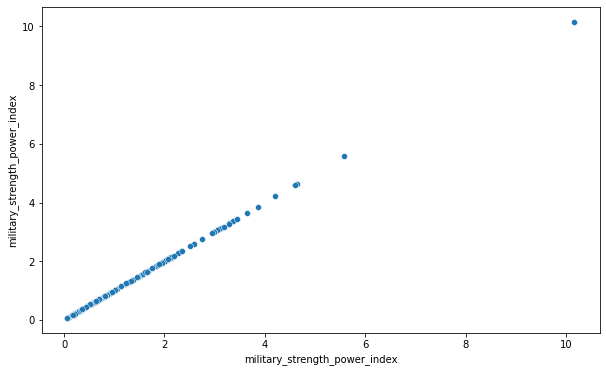

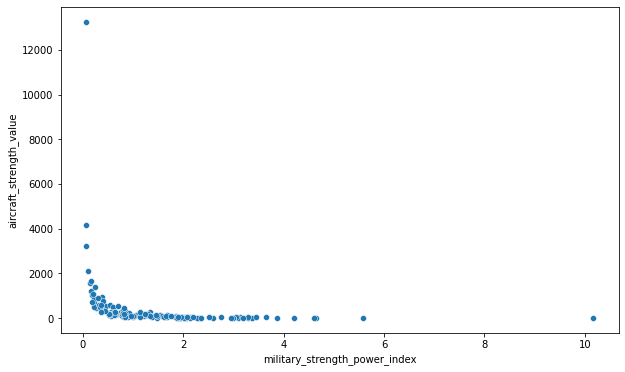

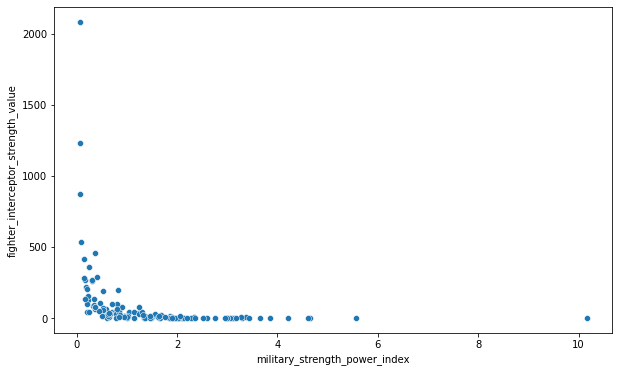

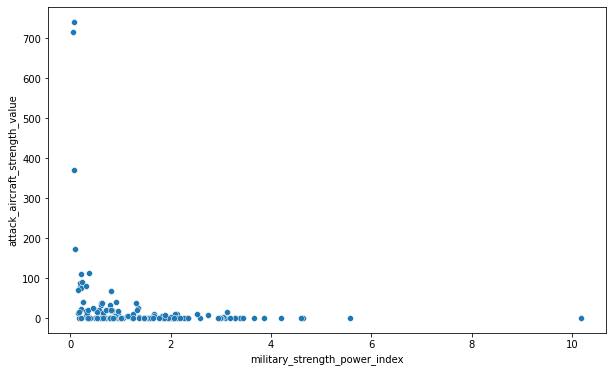

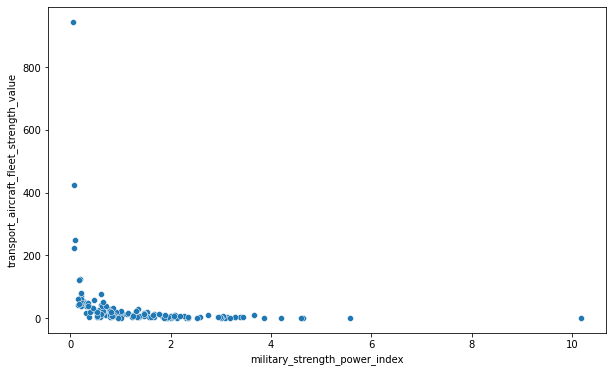

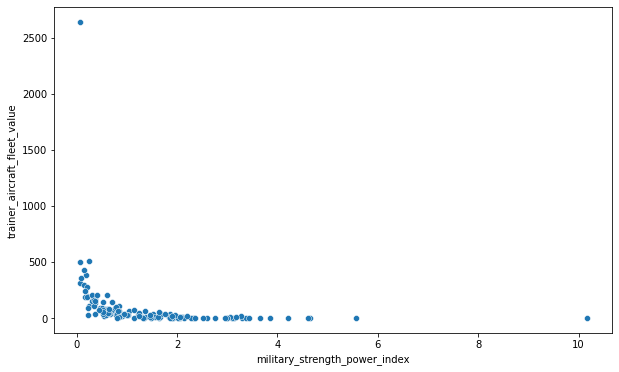

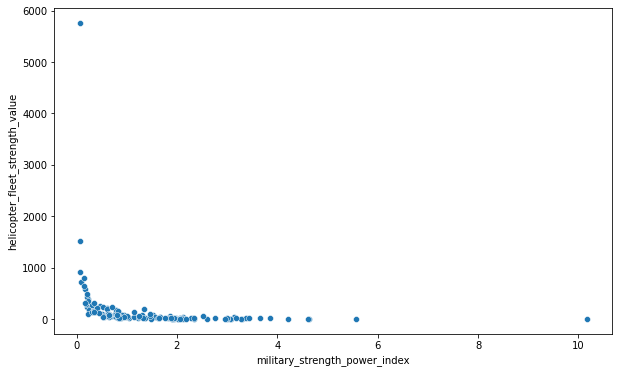

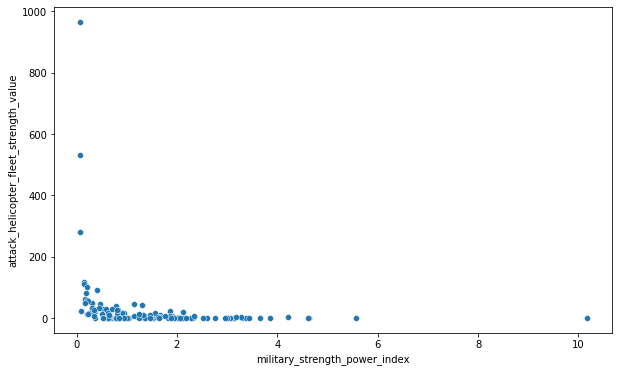

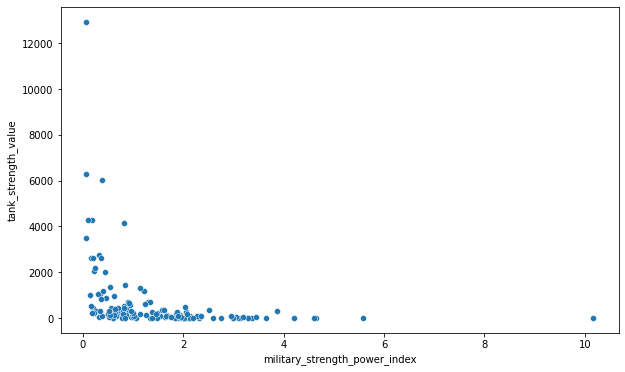

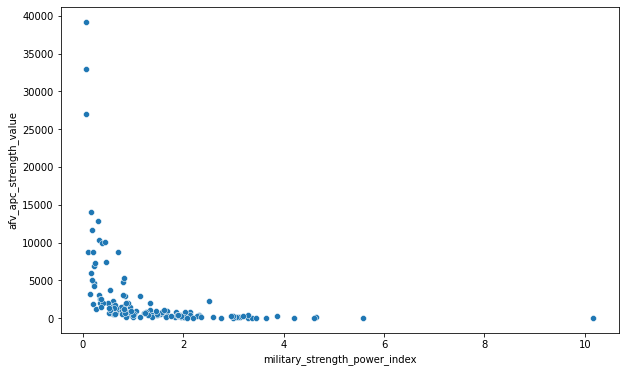

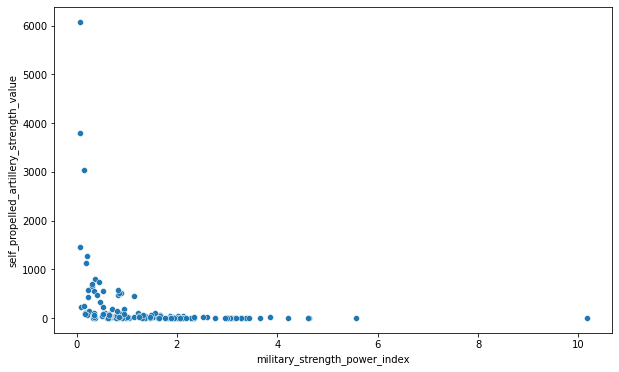

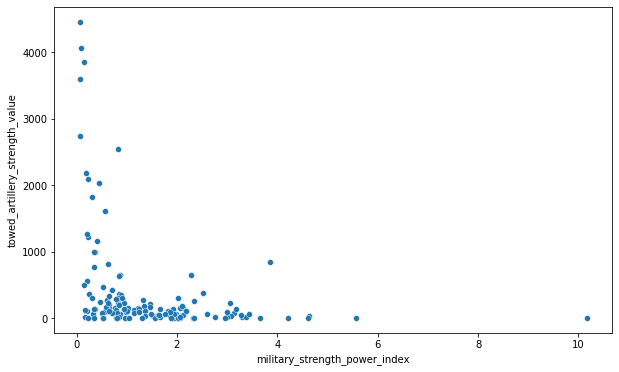

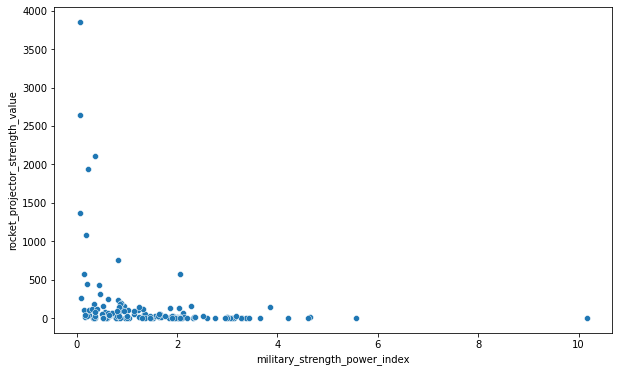

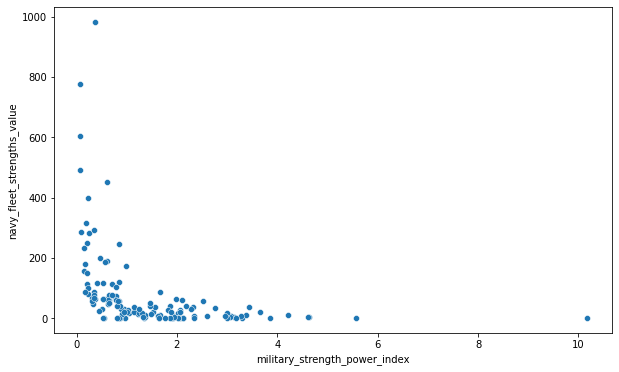

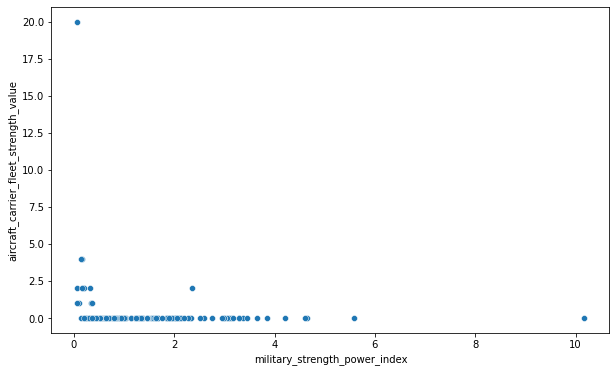

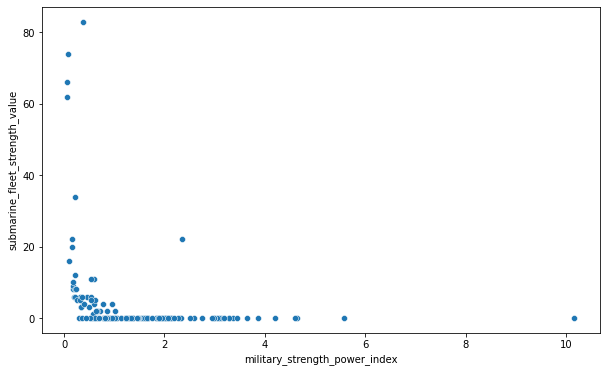

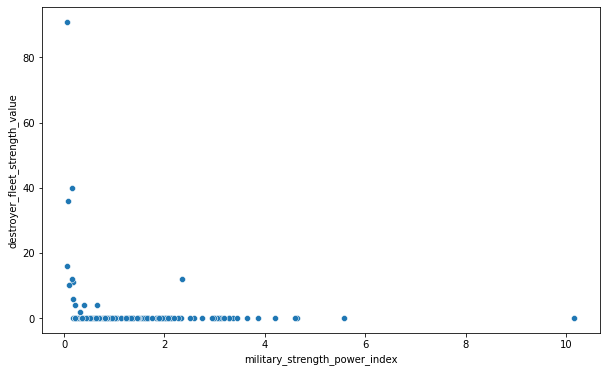

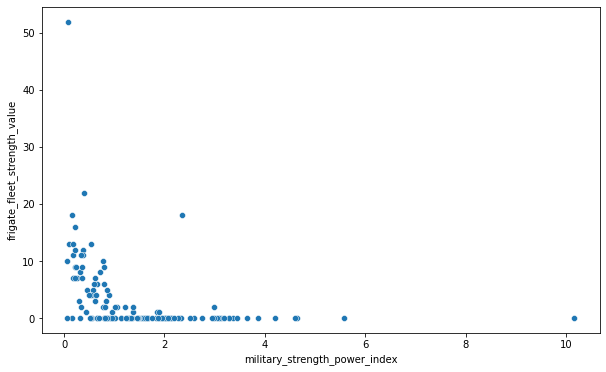

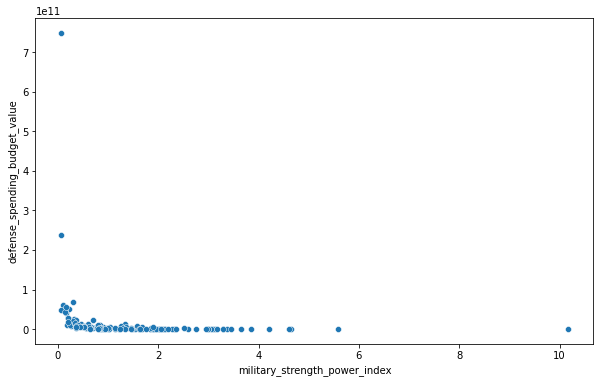

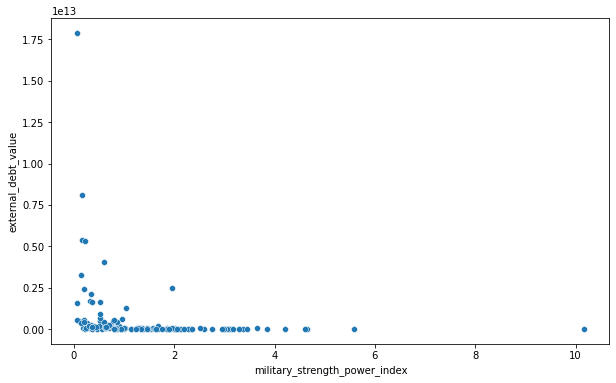

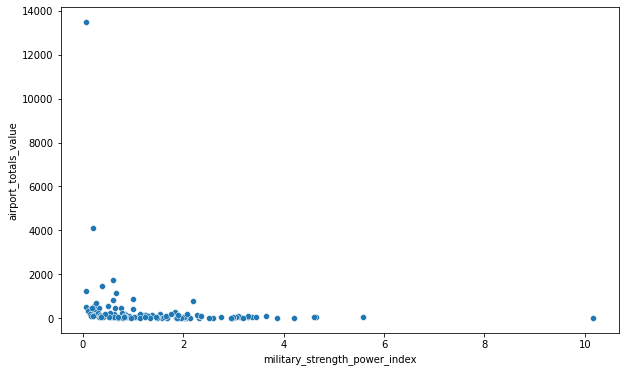

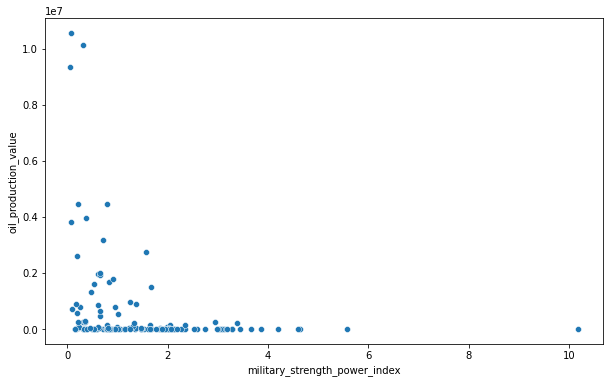

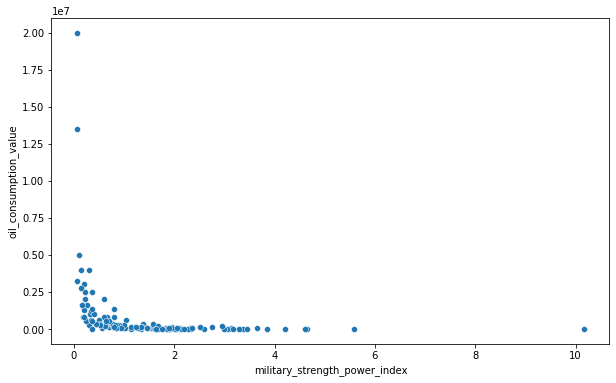

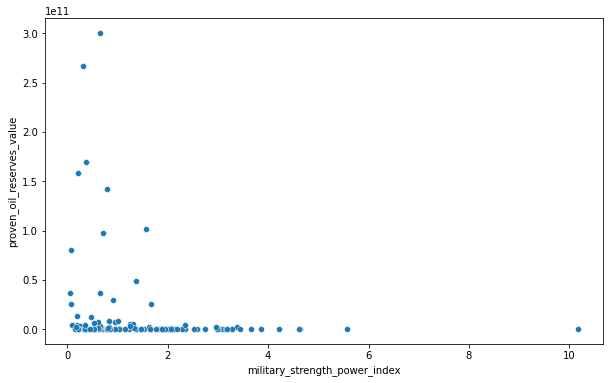

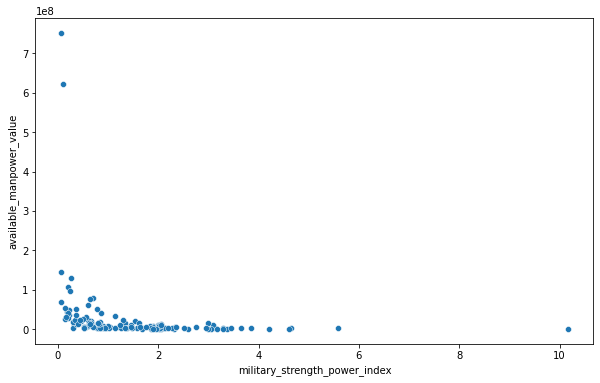

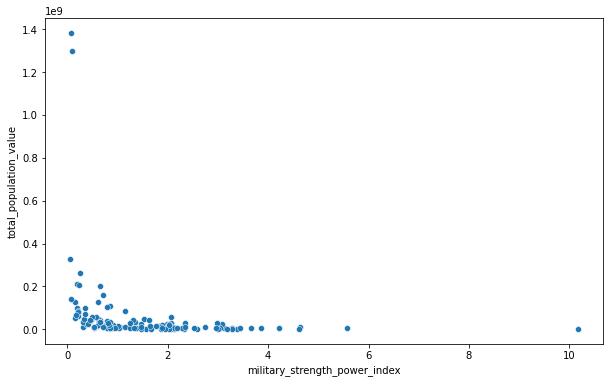

In [51]:
for col in df.columns:
    sns.scatterplot(data=df, x=df.military_strength_power_index, y=df[col])
    plt.show();

Let us focus on aircraft strength. This feature is strongly postitively related to air strike capacities. When a country has more air force instruments, then this indicates more aircraft strength as expected.

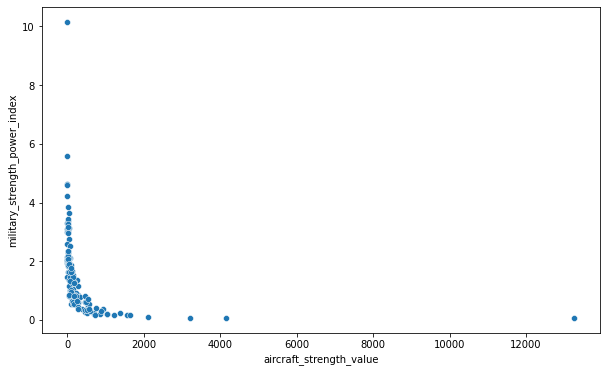

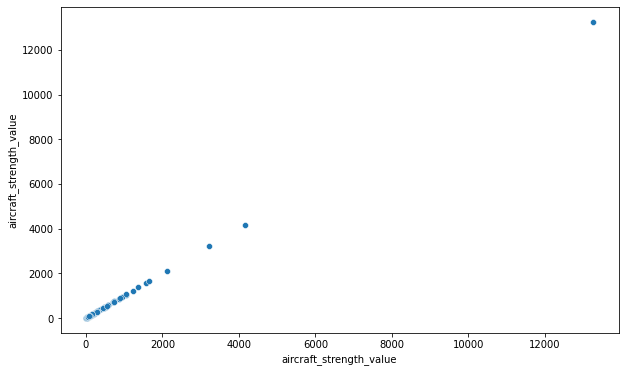

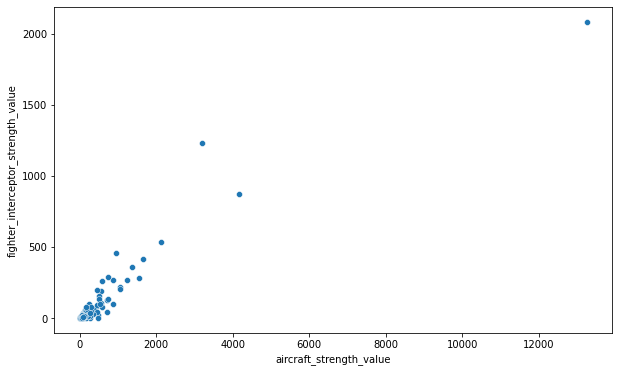

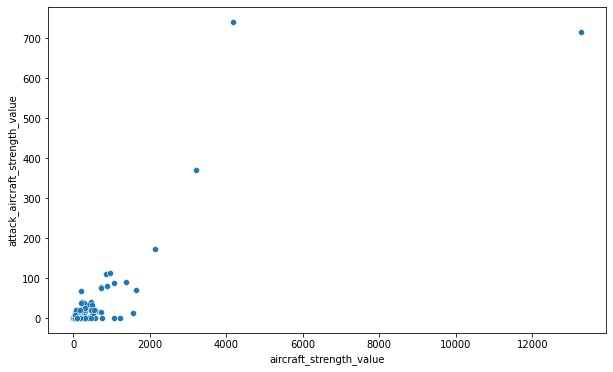

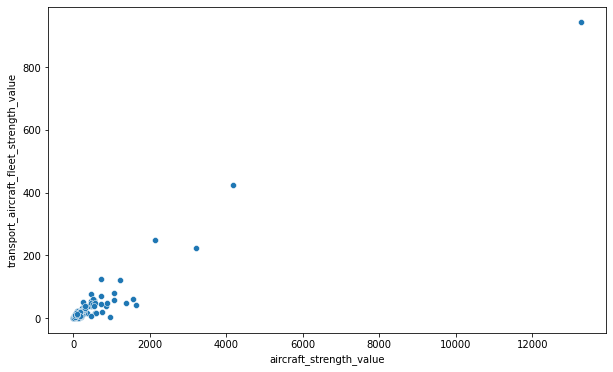

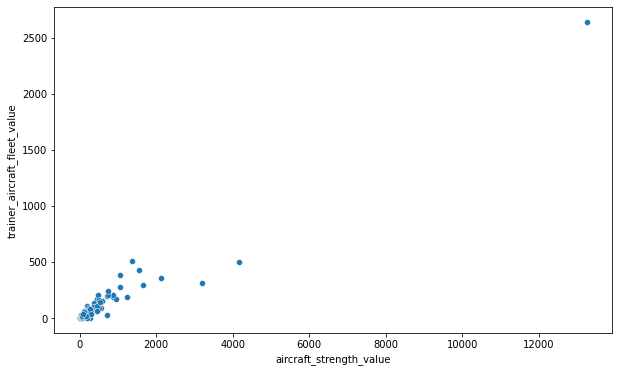

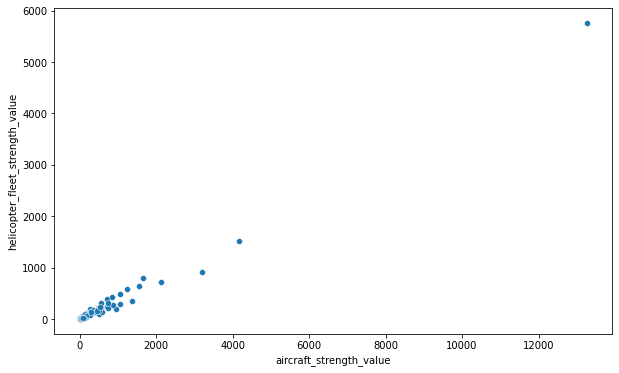

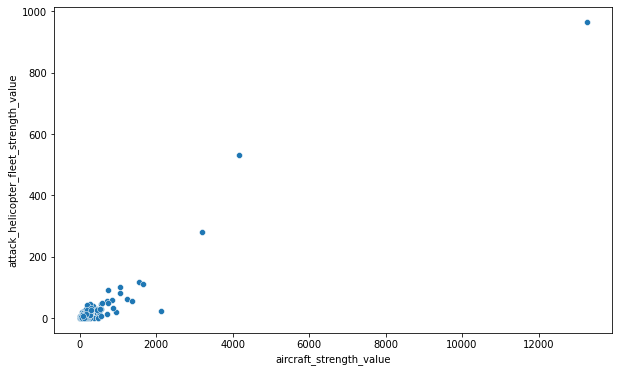

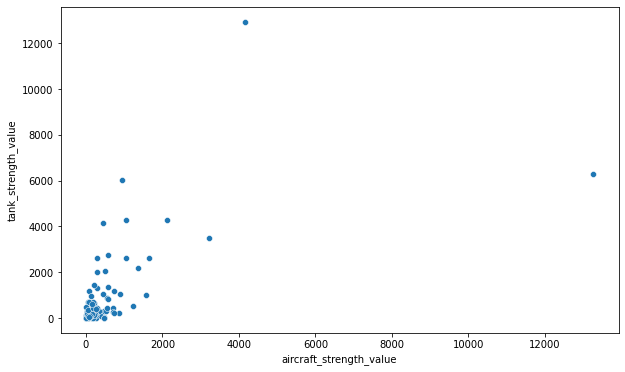

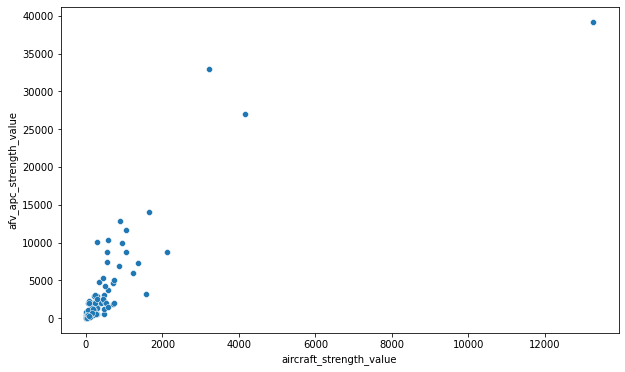

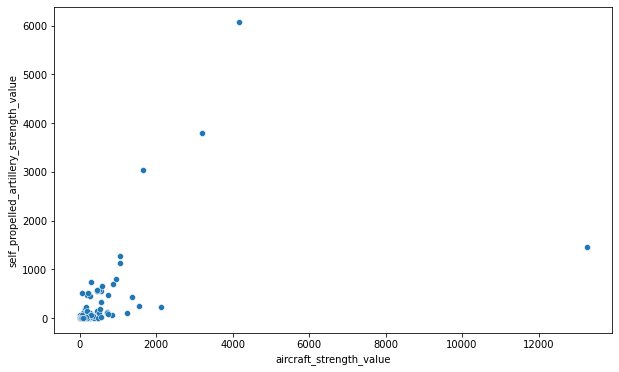

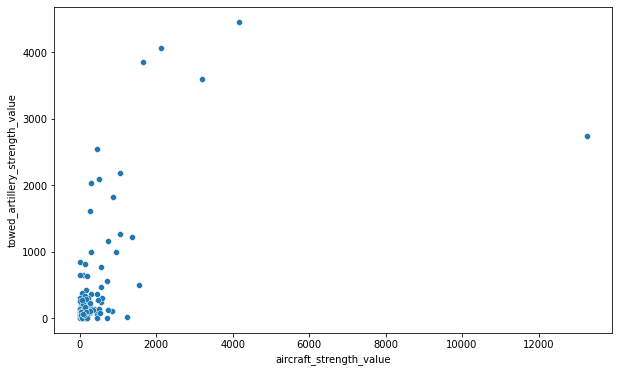

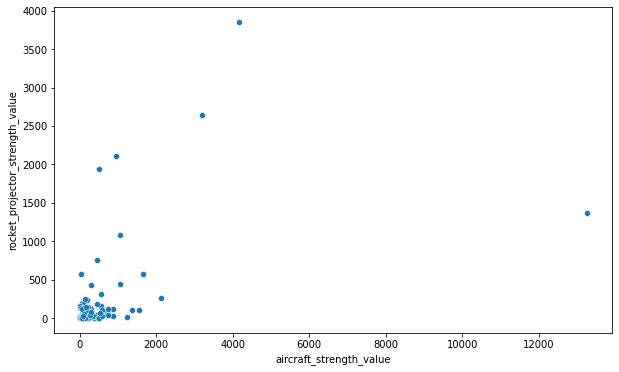

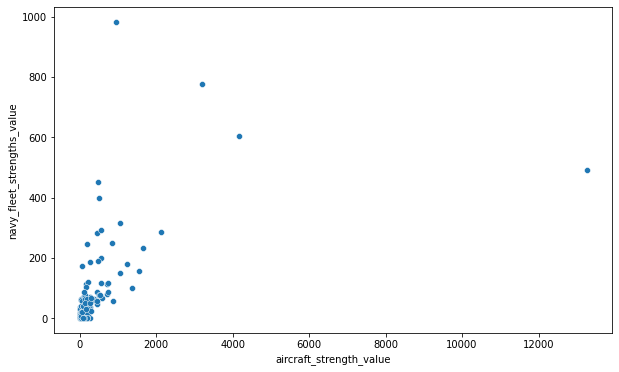

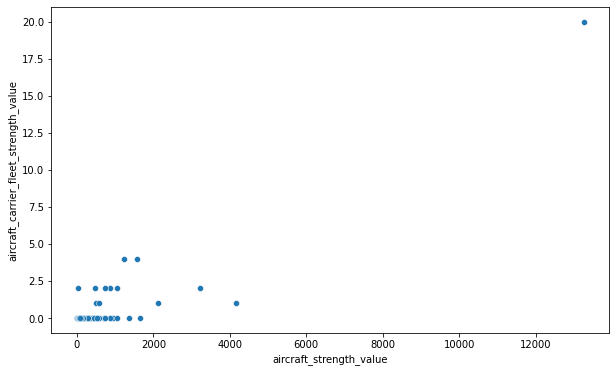

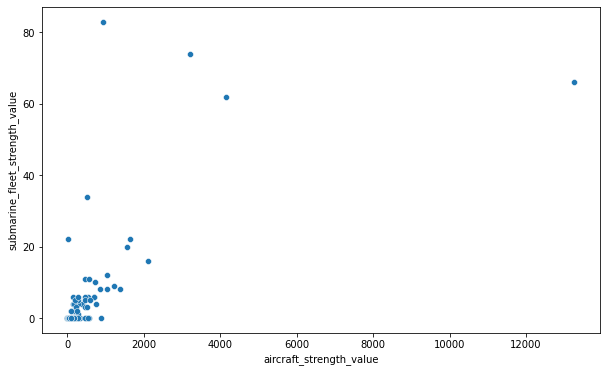

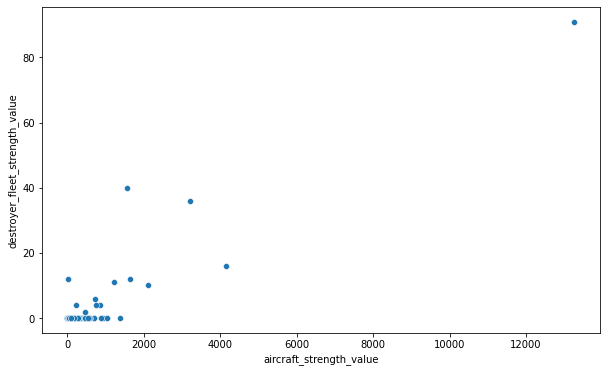

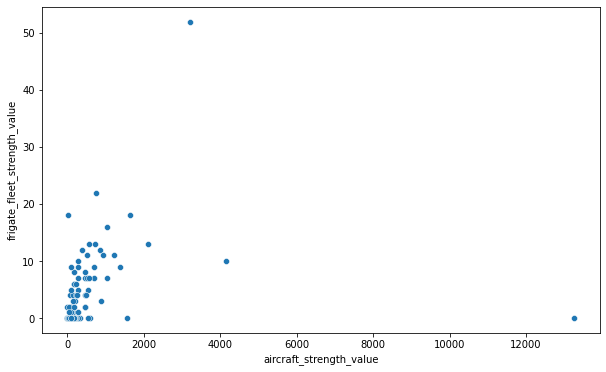

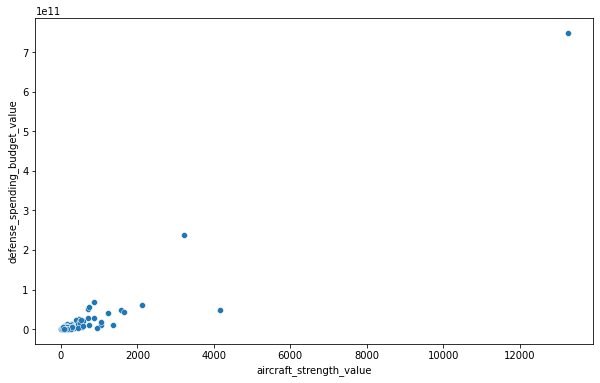

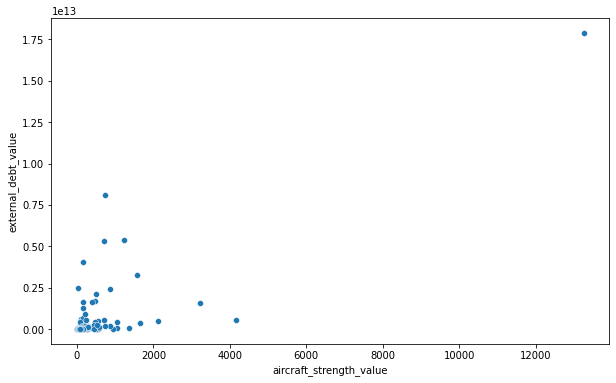

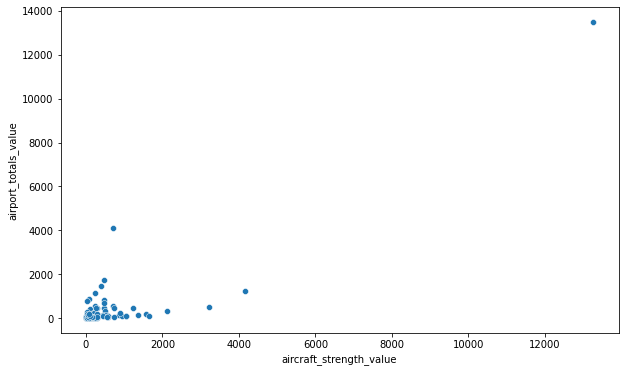

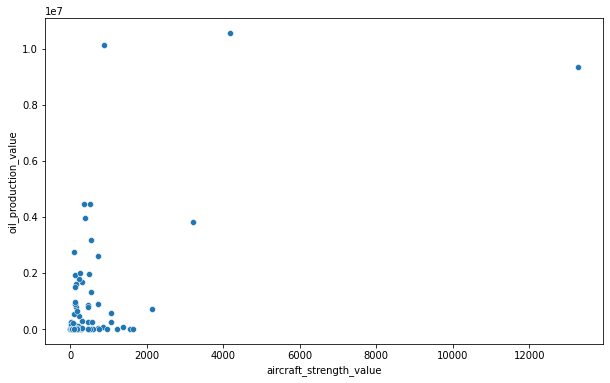

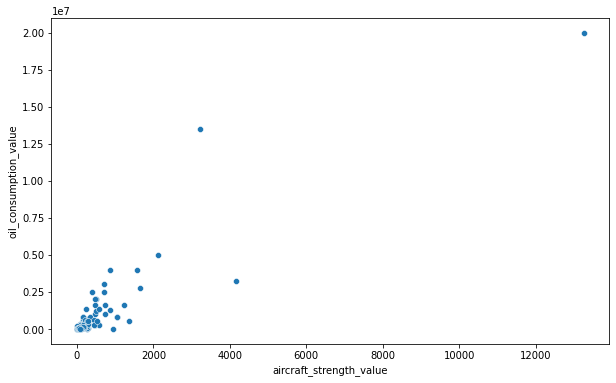

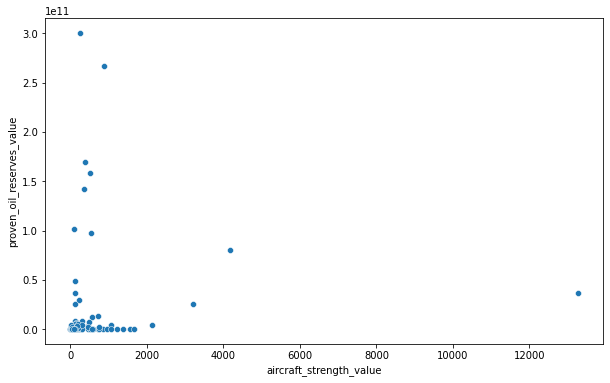

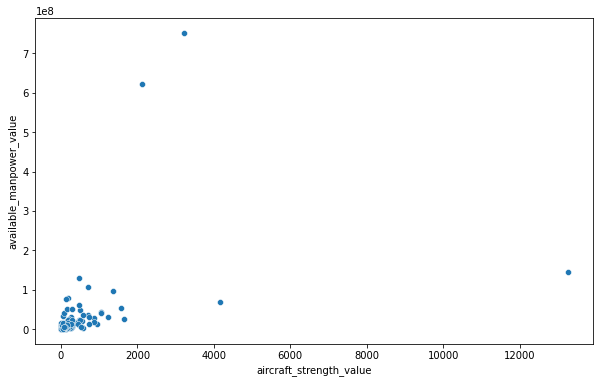

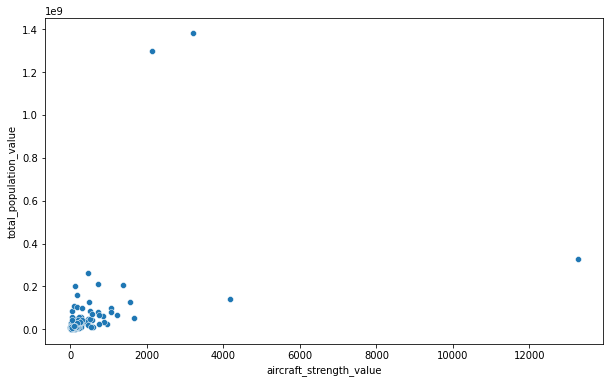

In [52]:
for col in df.columns:
    sns.scatterplot(data=df, x=df.aircraft_strength_value, y=df[col])
    plt.show();

Similar let us focus on navy strength. This feature is also strongly postitively related to strike capacities in seas. When a country has more strikers, then this indicates more navy strength as expected. For example, submarines considerably contribute this measurement.

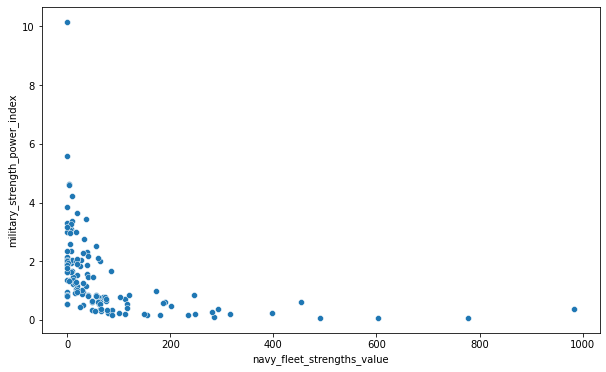

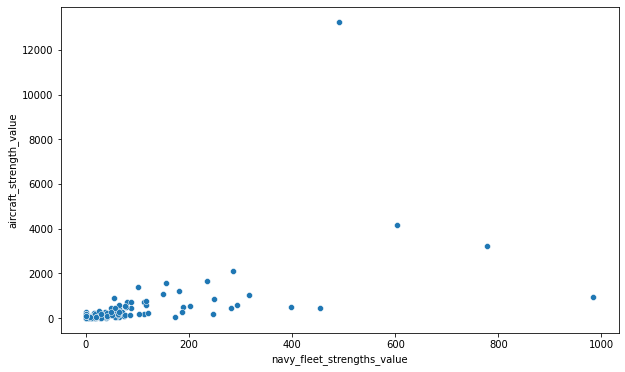

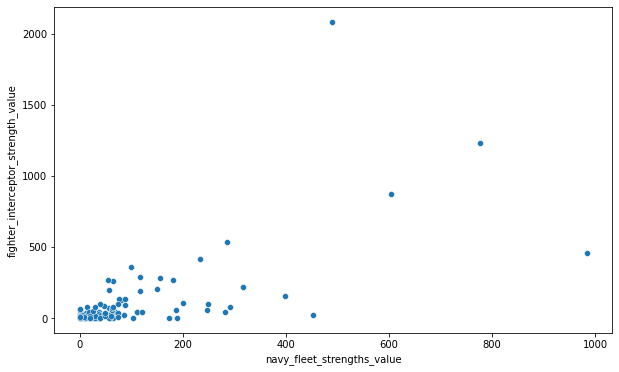

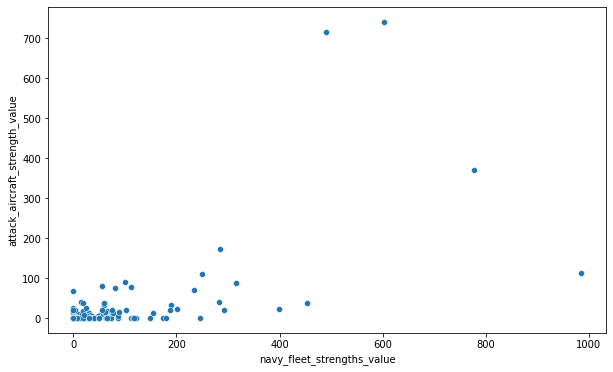

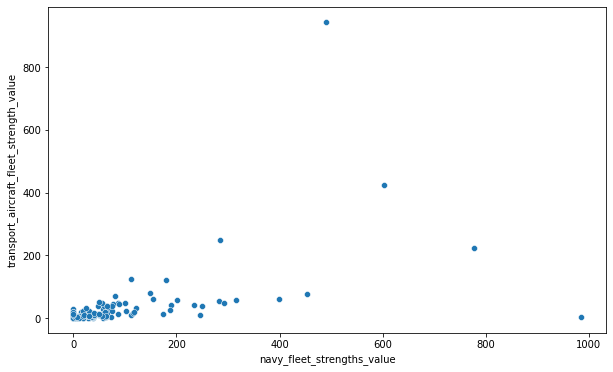

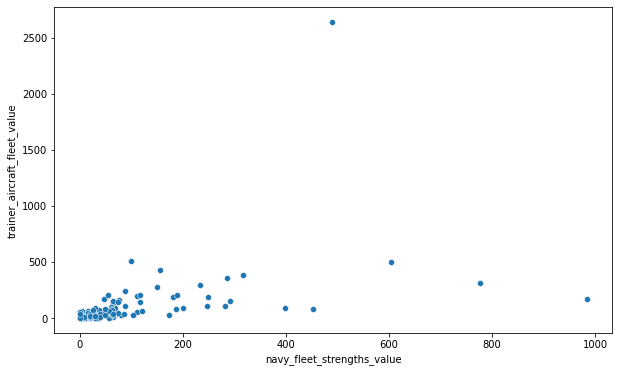

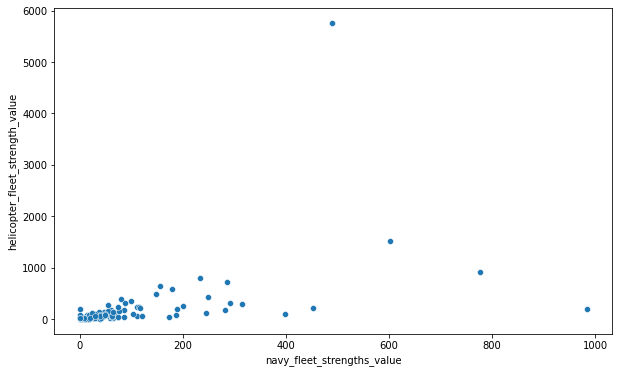

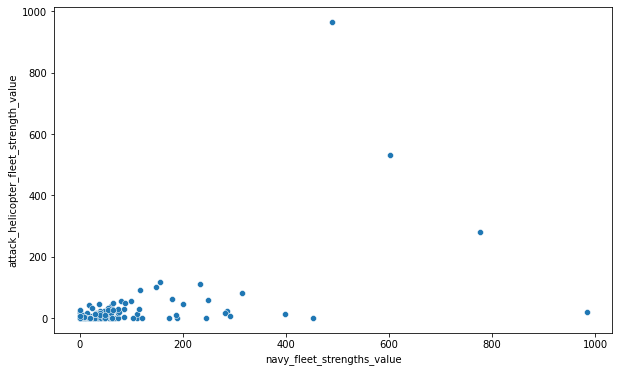

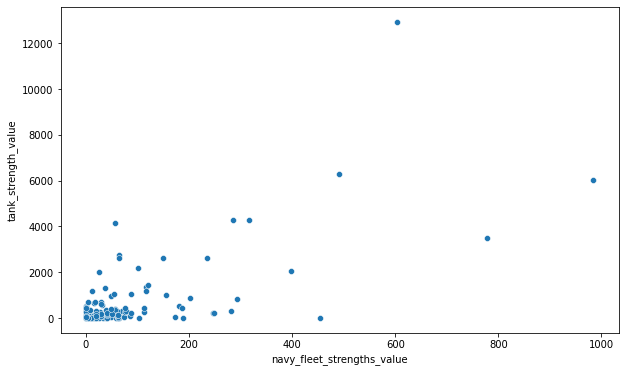

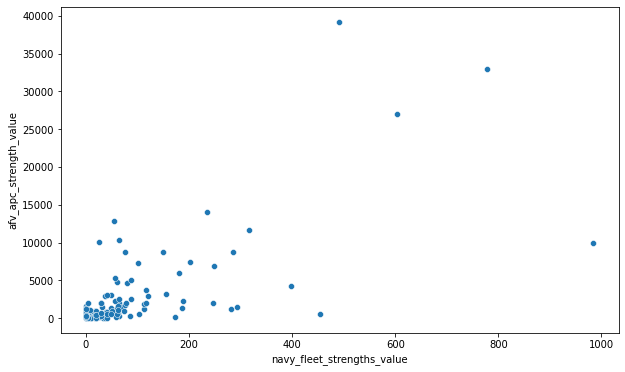

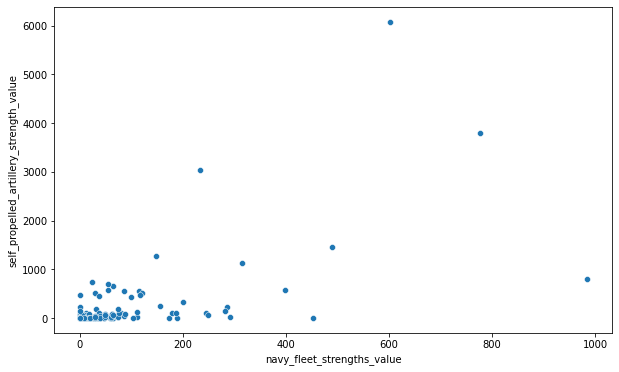

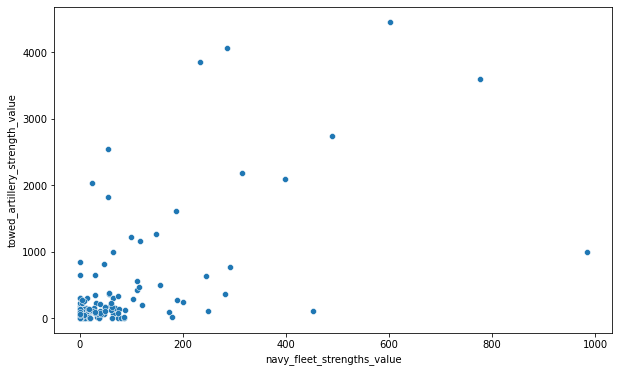

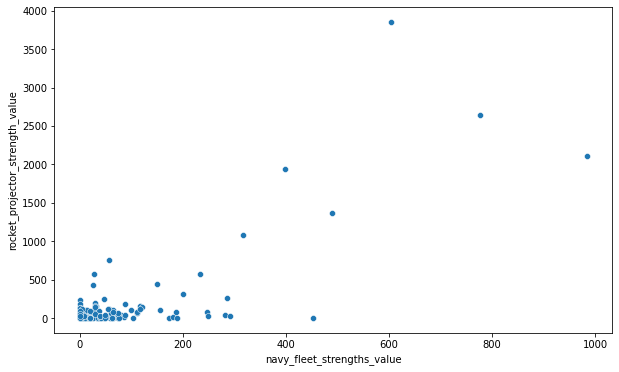

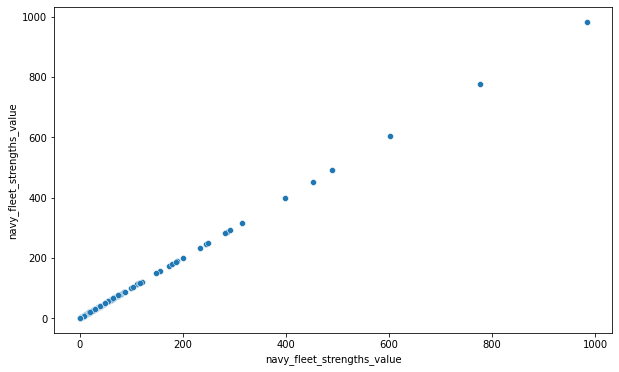

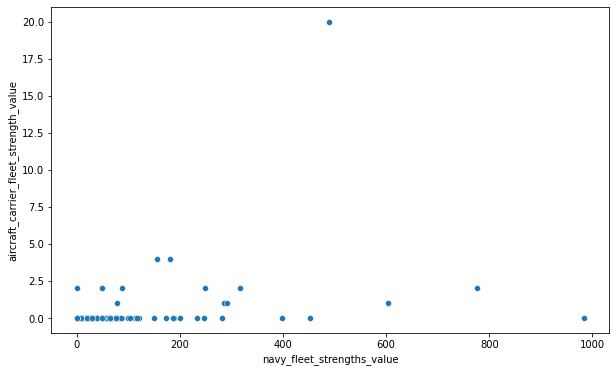

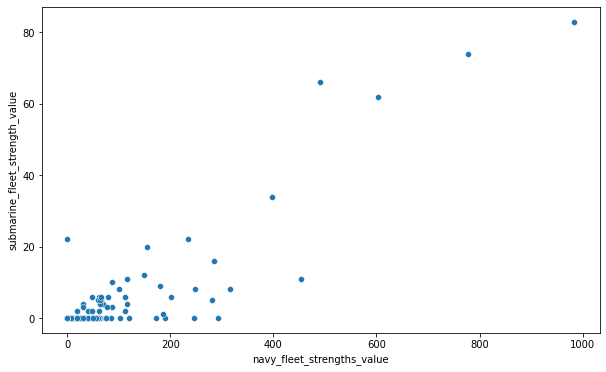

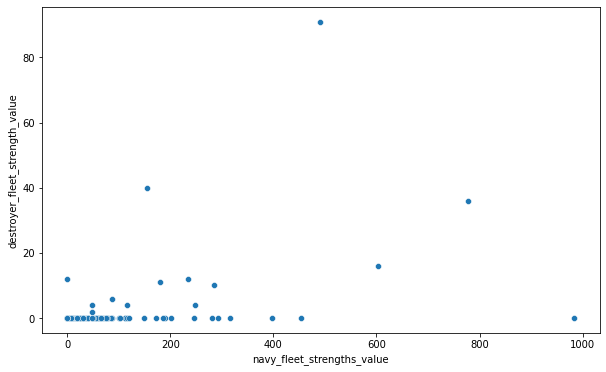

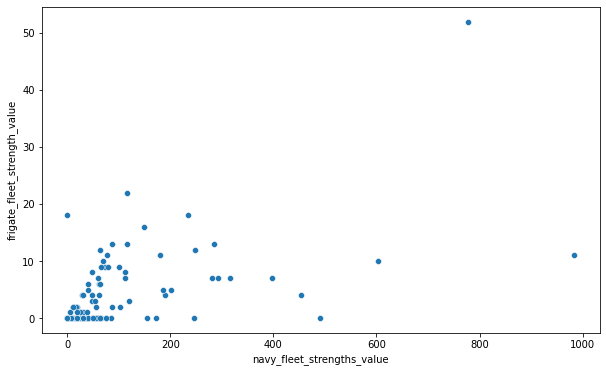

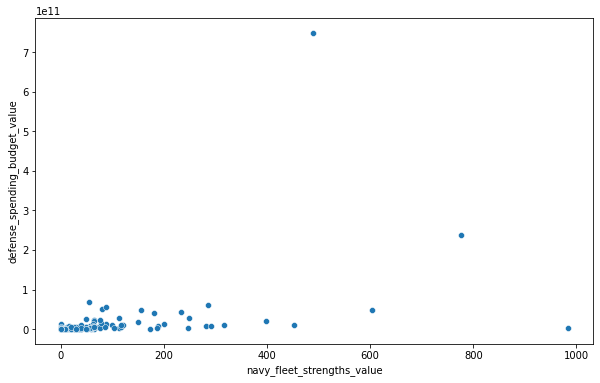

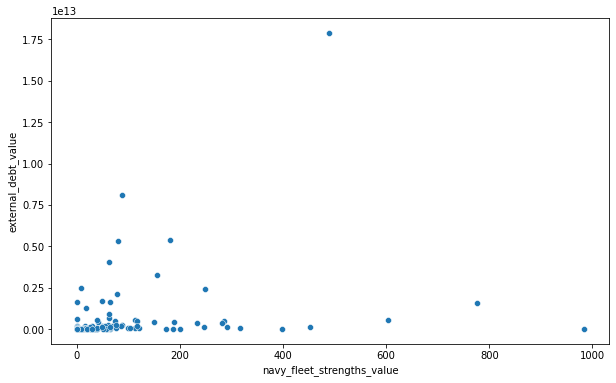

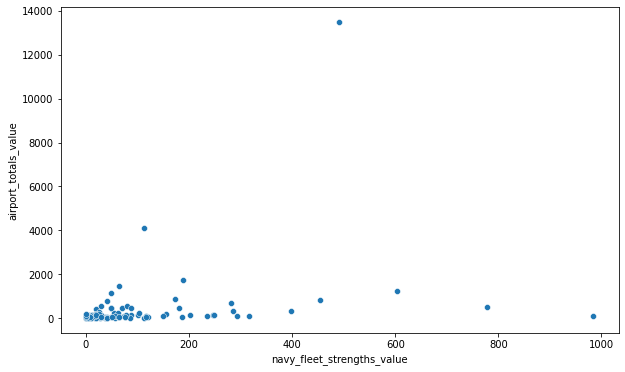

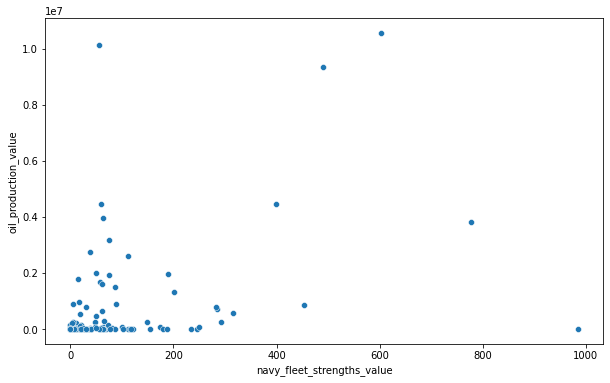

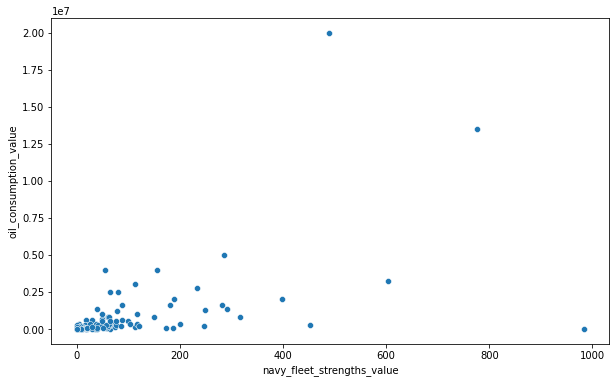

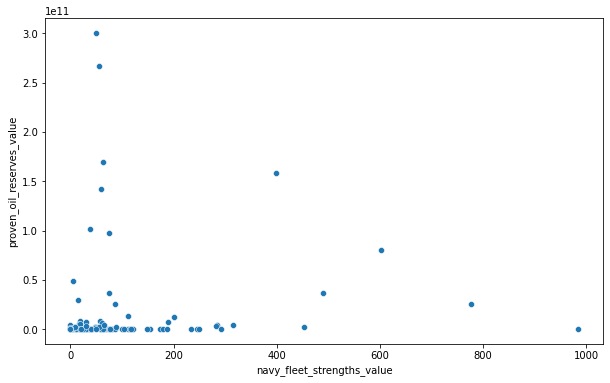

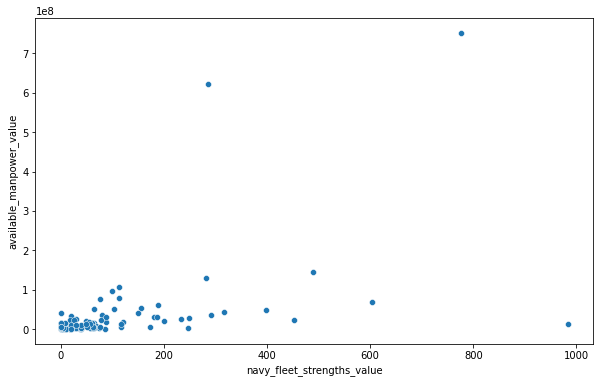

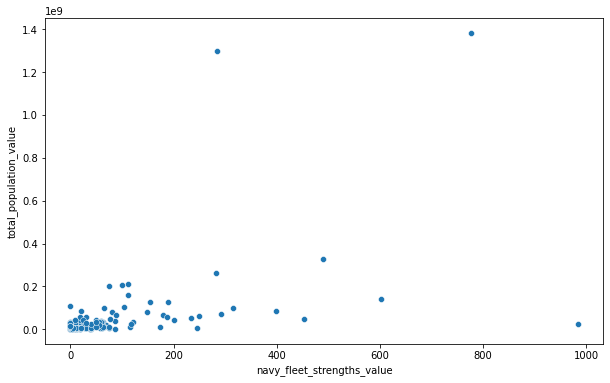

In [53]:
for col in df.columns:
    sns.scatterplot(data=df, x=df.navy_fleet_strengths_value, y=df[col])
    plt.show();


Furthermore, let us observe the correlation matrices. 

<AxesSubplot:>

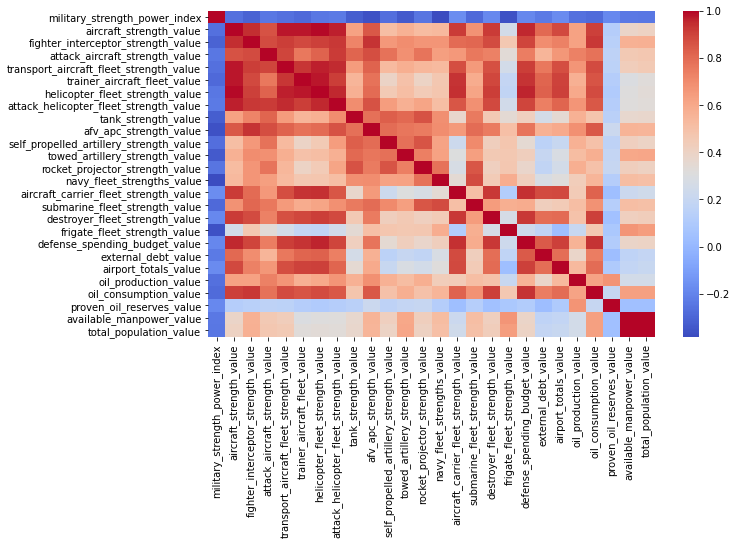

In [56]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

The correlation matrix above is so messy. Let us concentrate on higher correlations.

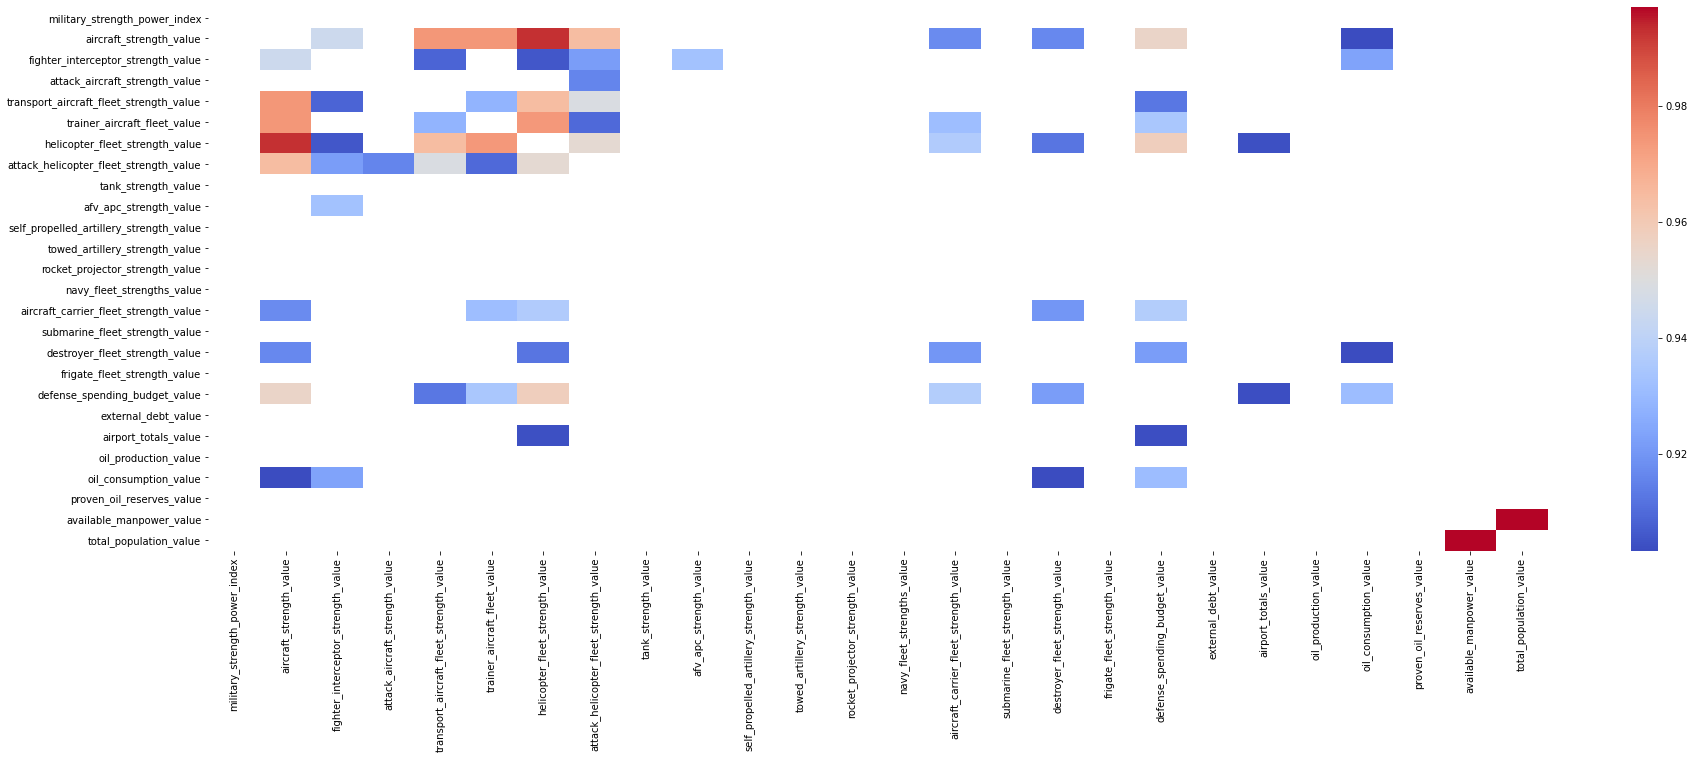

In [57]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .9) | (dfCorr <= -.9)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
plt.show()

__Summary:__ Total population positively contributes available manpower. This is quite logical. In addition to information above, there is negative correlation among air strike vehicles. For example, helicopter and fighter interceprtor have negative correlations. This means this investment is costly and any countries must have to choose one of them. Equally invesments on both options would not be preferred. Similarly, destroyer and aircraft carrier have negative relationships. This is simply because of high costs of having both.

## Decriptive statistics

In [54]:
df.describe().T

count             mean  \
military_strength_power_index           138.000            1.461   
aircraft_strength_value                 138.000          388.471   
fighter_interceptor_strength_value      138.000           81.565   
attack_aircraft_strength_value          138.000           25.761   
transport_aircraft_fleet_strength_value 138.000           30.232   
trainer_aircraft_fleet_value            138.000           82.833   
helicopter_fleet_strength_value         138.000          154.065   
attack_helicopter_fleet_strength_value  138.000           25.623   
tank_strength_value                     138.000          646.565   
afv_apc_strength_value                  138.000         2485.696   
self_propelled_artillery_strength_value 138.000          212.159   
towed_artillery_strength_value          138.000          393.978   
rocket_projector_strength_value         138.000          156.935   
navy_fleet_strengths_value              138.000           76.362   
aircraft_carrier_fleet_strength_value   138.000            0.319   
submarine_fleet_strength_value          138.000            4.159   
destroyer_fleet_strength_value          138.000            1.797   
frigate_fleet_strength_value            138.000            3.065   
defense_spending_budget_value           138.000  13993631641.210   
external_debt_value                     138.000 519498263043.478   
airport_totals_value                    138.000          290.043   
oil_production_value                    138.000       585552.355   
oil_consumption_value                   138.000       702018.696   
proven_oil_reserves_value               138.000  11944118420.290   
available_manpower_value                138.000     25442969.935   
total_population_value                  138.000     53180584.652   

                                                      std           min  \
military_strength_power_index                       1.324         0.061   
aircraft_strength_value                          1231.982         0.000   
fighter_interceptor_strength_value                230.325         0.000   
attack_aircraft_strength_value                     94.528         0.000   
transport_aircraft_fleet_strength_value            92.330         0.000   
trainer_aircraft_fleet_value                      240.804         0.000   
helicopter_fleet_strength_value                   520.184         0.000   
attack_helicopter_fleet_strength_value             97.326         0.000   
tank_strength_value                              1515.464         0.000   
afv_apc_strength_value                           5410.546         0.000   
self_propelled_artillery_strength_value           688.029         0.000   
towed_artillery_strength_value                    805.782         0.000   
rocket_projector_strength_value                   484.381         0.000   
navy_fleet_strengths_value                        140.822         0.000   
aircraft_carrier_fleet_strength_value               1.804         0.000   
submarine_fleet_strength_value                     12.719         0.000   
destroyer_fleet_strength_value                      9.195         0.000   
frigate_fleet_strength_value                        6.186         0.000   
defense_spending_budget_value             67311892724.125  13000000.000   
external_debt_value                     1847251527661.875 539400000.000   
airport_totals_value                             1212.967         2.000   
oil_production_value                          1667138.897         0.000   
oil_consumption_value                         2168810.056      2000.000   
proven_oil_reserves_value                 42750903273.129         0.000   
available_manpower_value                     84506975.276    132740.000   
total_population_value                      165108987.399    597927.000   

                                                   25%             50%  \
military_strength_power_index                    0.575           1.034   
aircraft_strength_value        

Notice that the range of features is very high. So, the scaling would be a better choice before modeling. Some features have bigger standard deviation. That might indicates some outliers.

# Data Preprocessing

In [55]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale

In [168]:
#let us keep original dataframe and create a copy
#sort by military power index and then reset index by dropping country name indices
df_new = df.copy()
#df_new.sort_values(by="military_strength_power_index", inplace=True)
#df_new.reset_index(drop=True, inplace=True)
df_new.head().T

country                                     Afghanistan        Albania  \
military_strength_power_index                     1.344          2.314   
aircraft_strength_value                         260.000         19.000   
fighter_interceptor_strength_value                0.000          0.000   
attack_aircraft_strength_value                   25.000          0.000   
transport_aircraft_fleet_strength_value          30.000          0.000   
trainer_aircraft_fleet_value                      0.000          0.000   
helicopter_fleet_strength_value                 187.000         19.000   
attack_helicopter_fleet_strength_value            0.000          0.000   
tank_strength_value                               0.000          0.000   
afv_apc_strength_value                         1062.000        467.000   
self_propelled_artillery_strength_value           0.000          0.000   
towed_artillery_strength_value                  176.000          0.000   
rocket_projector_strength_value                  50.000          0.000   
navy_fleet_strengths_value                        0.000         38.000   
aircraft_carrier_fleet_strength_value             0.000          0.000   
submarine_fleet_strength_value                    0.000          0.000   
destroyer_fleet_strength_value                    0.000          0.000   
frigate_fleet_strength_value                      0.000          0.000   
defense_spending_budget_value           12000000000.000  250000000.000   
external_debt_value                      2840000000.000 9505000000.000   
airport_totals_value                             43.000          4.000   
oil_production_value                              0.000      16000.000   
oil_consumption_value                          5500.000      42500.000   
proven_oil_reserves_value                         0.000  168300000.000   
available_manpower_value                   14325743.000    1519438.000   
total_population_value                     34940837.000    3057220.000   

country                                         Algeria          Angola  \
military_strength_power_index                     0.466           0.838   
aircraft_strength_value                         551.000         295.000   
fighter_interceptor_strength_value              103.000          72.000   
attack_aircraft_strength_value                   22.000          18.000   
transport_aircraft_fleet_strength_value          59.000          30.000   
trainer_aircraft_fleet_value                     87.000          47.000   
helicopter_fleet_strength_value                 257.000         126.000   
attack_helicopter_fleet_strength_value           45.000          15.000   
tank_strength_value                             880.000         379.000   
afv_apc_strength_value                         7361.000         595.000   
self_propelled_artillery_strength_value         320.000          28.000   
towed_artillery_strength_value                  240.000         357.000   
rocket_projector_strength_value                 316.000         115.000   
navy_fleet_strengths_value                      201.000          57.000   
aircraft_carrier_fleet_strength_value             0.000           0.000   
submarine_fleet_strength_value                    6.000           0.000   
destroyer_fleet_strength_value                    0.000           0.000   
frigate_fleet_strength_value                      5.000           0.000   
defense_spending_budget_value           13000000000.000  7000000000.000   
external_debt_value                      6260000000.000 42080000000.000   
airport_totals_value                            157.000         176.000   
oil_production_value                        1306000.000     1666000.000   
oil_consumption_value                        325000.000       82300.000   
proven_oil_reserves_value               12200000000.000  8273000000.000   
available_manpower_value                   20741263.000     6244205.000   
total_population_value                     41657488

In [170]:
df_new.reset_index(drop=True, inplace=True)
df_new.head().T

0              1  \
military_strength_power_index                     1.344          2.314   
aircraft_strength_value                         260.000         19.000   
fighter_interceptor_strength_value                0.000          0.000   
attack_aircraft_strength_value                   25.000          0.000   
transport_aircraft_fleet_strength_value          30.000          0.000   
trainer_aircraft_fleet_value                      0.000          0.000   
helicopter_fleet_strength_value                 187.000         19.000   
attack_helicopter_fleet_strength_value            0.000          0.000   
tank_strength_value                               0.000          0.000   
afv_apc_strength_value                         1062.000        467.000   
self_propelled_artillery_strength_value           0.000          0.000   
towed_artillery_strength_value                  176.000          0.000   
rocket_projector_strength_value                  50.000          0.000   
navy_fleet_strengths_value                        0.000         38.000   
aircraft_carrier_fleet_strength_value             0.000          0.000   
submarine_fleet_strength_value                    0.000          0.000   
destroyer_fleet_strength_value                    0.000          0.000   
frigate_fleet_strength_value                      0.000          0.000   
defense_spending_budget_value           12000000000.000  250000000.000   
external_debt_value                      2840000000.000 9505000000.000   
airport_totals_value                             43.000          4.000   
oil_production_value                              0.000      16000.000   
oil_consumption_value                          5500.000      42500.000   
proven_oil_reserves_value                         0.000  168300000.000   
available_manpower_value                   14325743.000    1519438.000   
total_population_value                     34940837.000    3057220.000   

                                                      2               3  \
military_strength_power_index                     0.466           0.838   
aircraft_strength_value                         551.000         295.000   
fighter_interceptor_strength_value              103.000          72.000   
attack_aircraft_strength_value                   22.000          18.000   
transport_aircraft_fleet_strength_value          59.000          30.000   
trainer_aircraft_fleet_value                     87.000          47.000   
helicopter_fleet_strength_value                 257.000         126.000   
attack_helicopter_fleet_strength_value           45.000          15.000   
tank_strength_value                             880.000         379.000   
afv_apc_strength_value                         7361.000         595.000   
self_propelled_artillery_strength_value         320.000          28.000   
towed_artillery_strength_value                  240.000         357.000   
rocket_projector_strength_value                 316.000         115.000   
navy_fleet_strengths_value                      201.000          57.000   
aircraft_carrier_fleet_strength_value             0.000           0.000   
submarine_fleet_strength_value                    6.000           0.000   
destroyer_fleet_strength_value                    0.000           0.000   
frigate_fleet_strength_value                      5.000           0.000   
defense_spending_budget_value           13000000000.000  7000000000.000   
external_debt_value                      6260000000.000 42080000000.000   
airport_totals_value                            157.000         176.000   
oil_production_value                        1306000.000     1666000.000   
oil_consumption_value                        325000.000       82300.000   
proven_oil_reserves_value               12200000000.000  8273000000.000   
available_manpower_value                   20741263.000     6244205.000   
total_population_value                     41657488.000    30355880.000   

                             

In [171]:
X = df_new

In [172]:
scaler = scale

In [173]:
X_scaled = pd.DataFrame(scaler(X))

In [175]:
X_scaled.head().T

0      1      2      3      4
0  -0.088  0.647 -0.754 -0.472 -0.613
1  -0.105 -0.301  0.132 -0.076 -0.132
2  -0.355 -0.355  0.093 -0.042 -0.251
3  -0.008 -0.274 -0.040 -0.082 -0.199
4  -0.003 -0.329  0.313 -0.003 -0.231
5  -0.345 -0.345  0.017 -0.149 -0.078
6   0.064 -0.261  0.199 -0.054 -0.104
7  -0.264 -0.264  0.200 -0.110 -0.264
8  -0.428 -0.428  0.155 -0.177 -0.183
9  -0.264 -0.374  0.904 -0.351 -0.324
10 -0.309 -0.309  0.157 -0.269 -0.188
11 -0.272 -0.491 -0.192 -0.046 -0.276
12 -0.222 -0.325  0.330 -0.087 -0.271
13 -0.544 -0.273  0.888 -0.138 -0.195
14 -0.177 -0.177 -0.177 -0.177 -0.177
15 -0.328 -0.328  0.145 -0.328 -0.170
16 -0.196 -0.196 -0.196 -0.196  0.240
17 -0.497 -0.497  0.314 -0.497 -0.497
18 -0.030 -0.205 -0.015 -0.104 -0.146
19 -0.281 -0.277 -0.279 -0.259 -0.165
20 -0.204 -0.237 -0.110 -0.094  0.702
21 -0.353 -0.343  0.434  0.650 -0.064
22 -0.322 -0.305 -0.174 -0.287 -0.008
23 -0.280 -0.276  0.006 -0.086 -0.229
24 -0.132 -0.284 -0.056 -0.228 -0.063
25 -0.111 -0.305 -0.070 -0.139 -0.052

In [176]:
X_scaled.shape

(138, 26)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [69]:
from pyclustertend import hopkins

The dataframe has to be scaled since the ranges are quite different for all features. Let us calculate hopkins test values with and without scaling.

In [177]:
#without scaling
hopkins(df, df.shape[0])

0.07889425135411504

In [178]:
#make copy of dataframe for three different scaling approach
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [179]:
hopkins(scale(df), df.shape[0])

0.07508583984729712

In [180]:
hopkins(scale(df1), df1.shape[0])

0.07600890162096437

In [181]:
hopkins(MinMaxScaler().fit_transform(df2), df2.shape[0])

0.08266084783116447

In [182]:
hopkins(StandardScaler().fit_transform(df3), df3.shape[0])

0.0754877464282172

__Summary:__ For all scalers as well as without scaling, hopkins tests indicate that dataframe is suitable to create clusters. But, the lowest score is obtained for ___'scale'___ method. Let us use ___'scale'___ in order to scale the dataset.

## Clustering with K-means

In [76]:
from sklearn.cluster import KMeans
K_means_model = KMeans(n_clusters=8,random_state = 101)

In [183]:
K_means_model.fit_predict(X_scaled)

array([1, 1, 6, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1,
       7, 1, 1, 1, 5, 6, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 6, 1, 1, 6,
       1, 6, 1, 1, 1, 0, 6, 4, 7, 1, 6, 6, 1, 6, 1, 1, 1, 7, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 7, 1, 1, 1, 1, 1, 1, 1,
       6, 1, 6, 1, 1, 1, 1, 1, 6, 6, 1, 1, 6, 1, 6, 1, 1, 6, 7, 6, 2, 1,
       1, 7, 6, 1, 1, 1])

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [184]:
#search over k values from 2 to 12
ssd = []

K = range(2,12)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

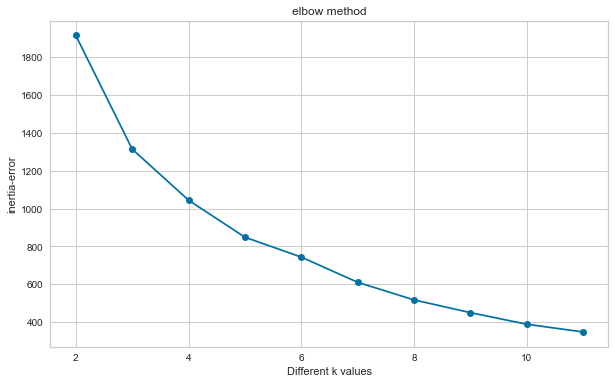

In [185]:
#visualize the errors with respect to k values
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [186]:
ssd # sum of squared distance

[1914.8988009153636,
 1314.4562532789641,
 1044.5544232965674,
 848.9497793451328,
 743.8012490914346,
 610.7096791023255,
 517.7756885919862,
 450.4843476035734,
 389.21794888633076,
 348.2252156182785]

In [187]:
df1_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df1_diff

0
1      NaN
2  600.443
3  269.902
4  195.605
5  105.149
6  133.092
7   92.934
8   67.291
9   61.266
10  40.993

<AxesSubplot:>

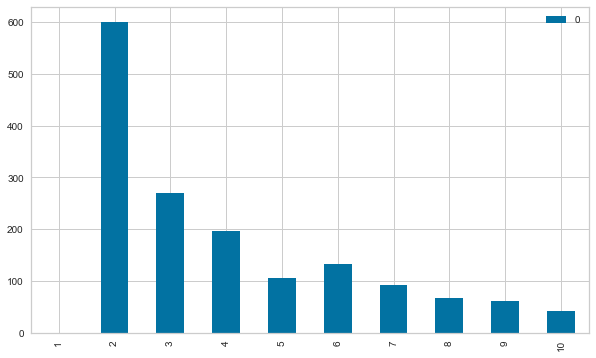

In [188]:
df1_diff.plot(kind='bar')

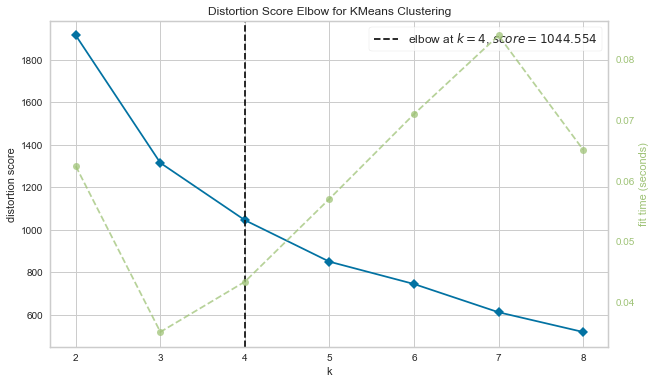

In [189]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

#### Silhoutte Analysis

In [83]:
from sklearn.metrics import silhouette_score

In [190]:
# silhouette score for k=8 which is default value of n_clusters
silhouette_score(X_scaled, K_means_model.labels_)  

0.46940572851392914

In [ ]:
range_n_clusters = range(2, 10)

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

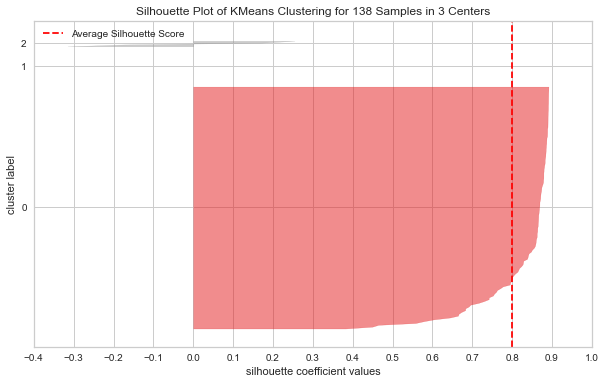

In [191]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=101)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

### Model Building and label visualisation

In [192]:
# n_clusters=4 is chosen as optimal k value

model = KMeans(n_clusters=4, random_state=101)

model.fit_predict(X_scaled)

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3,
       3, 3, 0, 3, 3, 3])

In [193]:
model.labels_

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3,
       3, 3, 0, 3, 3, 3])

In [194]:
X["clusters"] = model.fit_predict(X_scaled)

In [195]:
X.head().T

0              1  \
military_strength_power_index                     1.344          2.314   
aircraft_strength_value                         260.000         19.000   
fighter_interceptor_strength_value                0.000          0.000   
attack_aircraft_strength_value                   25.000          0.000   
transport_aircraft_fleet_strength_value          30.000          0.000   
trainer_aircraft_fleet_value                      0.000          0.000   
helicopter_fleet_strength_value                 187.000         19.000   
attack_helicopter_fleet_strength_value            0.000          0.000   
tank_strength_value                               0.000          0.000   
afv_apc_strength_value                         1062.000        467.000   
self_propelled_artillery_strength_value           0.000          0.000   
towed_artillery_strength_value                  176.000          0.000   
rocket_projector_strength_value                  50.000          0.000   
navy_fleet_strengths_value                        0.000         38.000   
aircraft_carrier_fleet_strength_value             0.000          0.000   
submarine_fleet_strength_value                    0.000          0.000   
destroyer_fleet_strength_value                    0.000          0.000   
frigate_fleet_strength_value                      0.000          0.000   
defense_spending_budget_value           12000000000.000  250000000.000   
external_debt_value                      2840000000.000 9505000000.000   
airport_totals_value                             43.000          4.000   
oil_production_value                              0.000      16000.000   
oil_consumption_value                          5500.000      42500.000   
proven_oil_reserves_value                         0.000  168300000.000   
available_manpower_value                   14325743.000    1519438.000   
total_population_value                     34940837.000    3057220.000   
clusters                                          3.000          3.000   

                                                      2               3  \
military_strength_power_index                     0.466           0.838   
aircraft_strength_value                         551.000         295.000   
fighter_interceptor_strength_value              103.000          72.000   
attack_aircraft_strength_value                   22.000          18.000   
transport_aircraft_fleet_strength_value          59.000          30.000   
trainer_aircraft_fleet_value                     87.000          47.000   
helicopter_fleet_strength_value                 257.000         126.000   
attack_helicopter_fleet_strength_value           45.000          15.000   
tank_strength_value                             880.000         379.000   
afv_apc_strength_value                         7361.000         595.000   
self_propelled_artillery_strength_value         320.000          28.000   
towed_artillery_strength_value                  240.000         357.000   
rocket_projector_strength_value                 316.000         115.000   
navy_fleet_strengths_value                      201.000          57.000   
aircraft_carrier_fleet_strength_value             0.000           0.000   
submarine_fleet_strength_value                    6.000           0.000   
destroyer_fleet_strength_value                    0.000           0.000   
frigate_fleet_strength_value                      5.000           0.000   
defense_spending_budget_value           13000000000.000  7000000000.000   
external_debt_value                      6260000000.000 42080000000.000   
airport_totals_value                            157.000         176.000   
oil_production_value                        1306000.000     1666000.000   
oil_consumption_value                        325000.000       82300.000   
proven_oil_reserves_value               12200000000.000  8273000000.000   
available_manpower_value                   20741263.000     6244205.000   
total_population_value         

In [196]:
X.clusters.value_counts()

3    112
0     23
1      2
2      1
Name: clusters, dtype: int64

In [205]:
df1["predicted_clusters"] = model.fit_predict(X_scaled)

In [206]:
#sort dataframe with ascending order of military power index
df1.sort_values(by="military_strength_power_index", inplace=True)
df1.reset_index(inplace=True)
df1.head()

country  military_strength_power_index  aircraft_strength_value  \
0  United States                          0.061                13264.000   
1         Russia                          0.068                 4163.000   
2          China                          0.069                 3210.000   
3          India                          0.095                 2123.000   
4          Japan                          0.150                 1561.000   

   fighter_interceptor_strength_value  attack_aircraft_strength_value  \
0                            2085.000                         715.000   
1                             873.000                         742.000   
2                            1232.000                         371.000   
3                             538.000                         172.000   
4                             279.000                          12.000   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                  945.000                      2643.000   
1                                  424.000                       497.000   
2                                  224.000                       314.000   
3                                  250.000                       359.000   
4                                   60.000                       427.000   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                         5768.000                                 967.000   
1                         1522.000                                 531.000   
2                          911.000                                 281.000   
3                          722.000                                  23.000   
4                          637.000                                 119.000   

   tank_strength_value  afv_apc_strength_value  \
0             6289.000               39253.000   
1            12950.000               27038.000   
2             3500.000               33000.000   
3             4292.000                8686.000   
4             1004.000                3130.000   

   self_propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                 1465.000                        2740.000   
1                                 6083.000                        4465.000   
2                                 3800.000                        3600.000   
3                                  235.000                        4060.000   
4                                  238.000                         500.000   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                         1366.000                     490.000   
1                         3860.000                     603.000   
2                         2650.000                     777.000   
3                          266.000                     285.000   
4                           99.000                     155.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                 20.000                          66.000   
1                                  1.000                          62.000   
2                                  2.000                          74.000   
3                                  1.000                          16.000   
4                                  4.000                          20.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                          91.000                         0.000   
1                          16.000                        10.000   
2                          36.000                        52.000   
3                          10.000                        13.000   
4                          40.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0               750000000000.000   17910000000000.000             13513.000   
1 

In [207]:
X.clusters.value_counts()

3    112
0     23
1      2
2      1
Name: clusters, dtype: int64

In the sorted dataframe, let us assign first row to second class, the following two rows to first class, the following 23 rows to zero class and the rest to thirs class.

In [212]:
df1.loc[26:138, "actual_clusters"] = 3
df1.loc[3:25, "actual_clusters"] = 0
df1.loc[1:2,"actual_clusters"] = 1
df1.loc[0:0, "actual_clusters"] = 2
df1[['country','actual_clusters','predicted_clusters']]

country  actual_clusters  predicted_clusters
0                       United States            2.000                   2
1                              Russia            1.000                   1
2                               China            1.000                   1
3                               India            0.000                   0
4                               Japan            0.000                   0
5                         South Korea            0.000                   0
6                              France            0.000                   0
7                      United Kingdom            0.000                   0
8                               Egypt            0.000                   0
9                              Brazil            0.000                   0
10                             Turkey            0.000                   0
11                              Italy            0.000                   0
12                            Germany            0.000                   0
13                               Iran            0.000                   0
14                           Pakistan            0.000                   0
15                          Indonesia            0.000                   0
16                       Saudi Arabia            0.000                   0
17                             Israel            0.000                   3
18                          Australia            0.000                   3
19                              Spain            0.000                   3
20                             Poland            0.000                   3
21                            Vietnam            0.000                   0
22                           Thailand            0.000                   0
23                             Canada            0.000                   0
24                        North Korea            0.000                   0
25                             Taiwan            0.000                   0
26                            Ukraine            3.000                   0
27                            Algeria            3.000                   0
28                       South Africa            3.000                   3
29                        Switzerland            3.000                   3
30                             Norway            3.000                   3
31                             Sweden            3.000                   3
32                             Greece            3.000                   0
33                            Czechia            3.000                   3
34                            Myanmar            3.000                   3
35                        Netherlands            3.000                   3
36                           Colombia            3.000                   3
37                             Mexico            3.000                   3
38                            Romania            3.000                   3
39                               Peru            3.000                   3
40                          Venezuela            3.000                   3
41                            Nigeria            3.000                   3
42                          Argentina            3.000                   3
43                           Malaysia            3.000                   3
44               United Arab Emirates            3.000                   3
45                         Bangladesh            3.000                   3
46                              Chile            3.000                   3
47                        Philippines            3.000                   3
48                            Denmark            3.000                   3
49                               Iraq            3.000                   3
50                          Singapore            3.000                   3
51                         Uzbekistan            3.000                   3
52                            Belarus            3.000 

In [213]:
df1["predicted_military_power"] = df1["predicted_clusters"].map({0 : "powerfull",
                                                                 1 : "more_powerfull",
                                                                 2 : "most_powerful",
                                                                 3 : "weak"})

In [214]:
(df1["actual_clusters"]==df1["predicted_clusters"]).value_counts()

True     130
False      8
dtype: int64

In [215]:
pd.crosstab(index=df1["actual_clusters"], columns=df1["predicted_clusters"])

predicted_clusters   0  1  2    3
actual_clusters                  
0.000               19  0  0    4
1.000                0  2  0    0
2.000                0  0  1    0
3.000                4  0  0  108

In [216]:
df1[df1['actual_clusters']!=df1['predicted_clusters']].T

17                18  \
country                                          Israel         Australia   
military_strength_power_index                     0.311             0.323   
aircraft_strength_value                         589.000           464.000   
fighter_interceptor_strength_value              259.000            82.000   
attack_aircraft_strength_value                   18.000             6.000   
transport_aircraft_fleet_strength_value          15.000            38.000   
trainer_aircraft_fleet_value                    154.000           174.000   
helicopter_fleet_strength_value                 146.000           133.000   
attack_helicopter_fleet_strength_value           48.000            22.000   
tank_strength_value                            2760.000            59.000   
afv_apc_strength_value                        10275.000          3051.000   
self_propelled_artillery_strength_value         650.000             0.000   
towed_artillery_strength_value                  300.000            54.000   
rocket_projector_strength_value                 100.000             0.000   
navy_fleet_strengths_value                       65.000            48.000   
aircraft_carrier_fleet_strength_value             0.000             2.000   
submarine_fleet_strength_value                    5.000             6.000   
destroyer_fleet_strength_value                    0.000             2.000   
frigate_fleet_strength_value                      0.000             8.000   
defense_spending_budget_value           20000000000.000   26300000000.000   
external_debt_value                     88660000000.000 1714000000000.000   
airport_totals_value                             47.000           480.000   
oil_production_value                            390.000        263000.000   
oil_consumption_value                        250000.000       1005000.000   
proven_oil_reserves_value                  12730000.000    1821000000.000   
available_manpower_value                    3647983.000      10808002.000   
total_population_value                      8424904.000      23470145.000   
predicted_clusters                                    3                 3   
actual_clusters                                   0.000             0.000   
predicted_military_power                           weak              weak   

                                                       19               20  \
country                                             Spain           Poland   
military_strength_power_index                       0.339            0.340   
aircraft_strength_value                           512.000          457.000   
fighter_interceptor_strength_value                137.000           91.000   
attack_aircraft_strength_value                     12.000            0.000   
transport_aircraft_fleet_strength_value            46.000           49.000   
trainer_aircraft_fleet_value                      162.000          104.000   
helicopter_fleet_strength_value                   162.000          176.000   
attack_helicopter_fleet_strength_value             19.000           30.000   
tank_strength_value                               327.000         1069.000   
afv_apc_strength_value                           2023.000         2547.000   
self_propelled_artillery_strength_value            95.000          547.000   
towed_artillery_strength_value                    140.000            0.000   
rocket_projector_strength_value                     0.000          180.000   
navy_fleet_strengths_value                         77.000           87.000   
aircraft_carrier_fleet_strength_value               1.000            0.000   
submarine_fleet_strength_value                      3.000            3.000   
destroyer_fleet_strength_value                      0.000            0.000   
frigate_fleet_strength_value                       11.000            2.000   
defense_spending_budget_value             15100000000.000  12000000000.000   
external_debt_value        

### Evaluate 

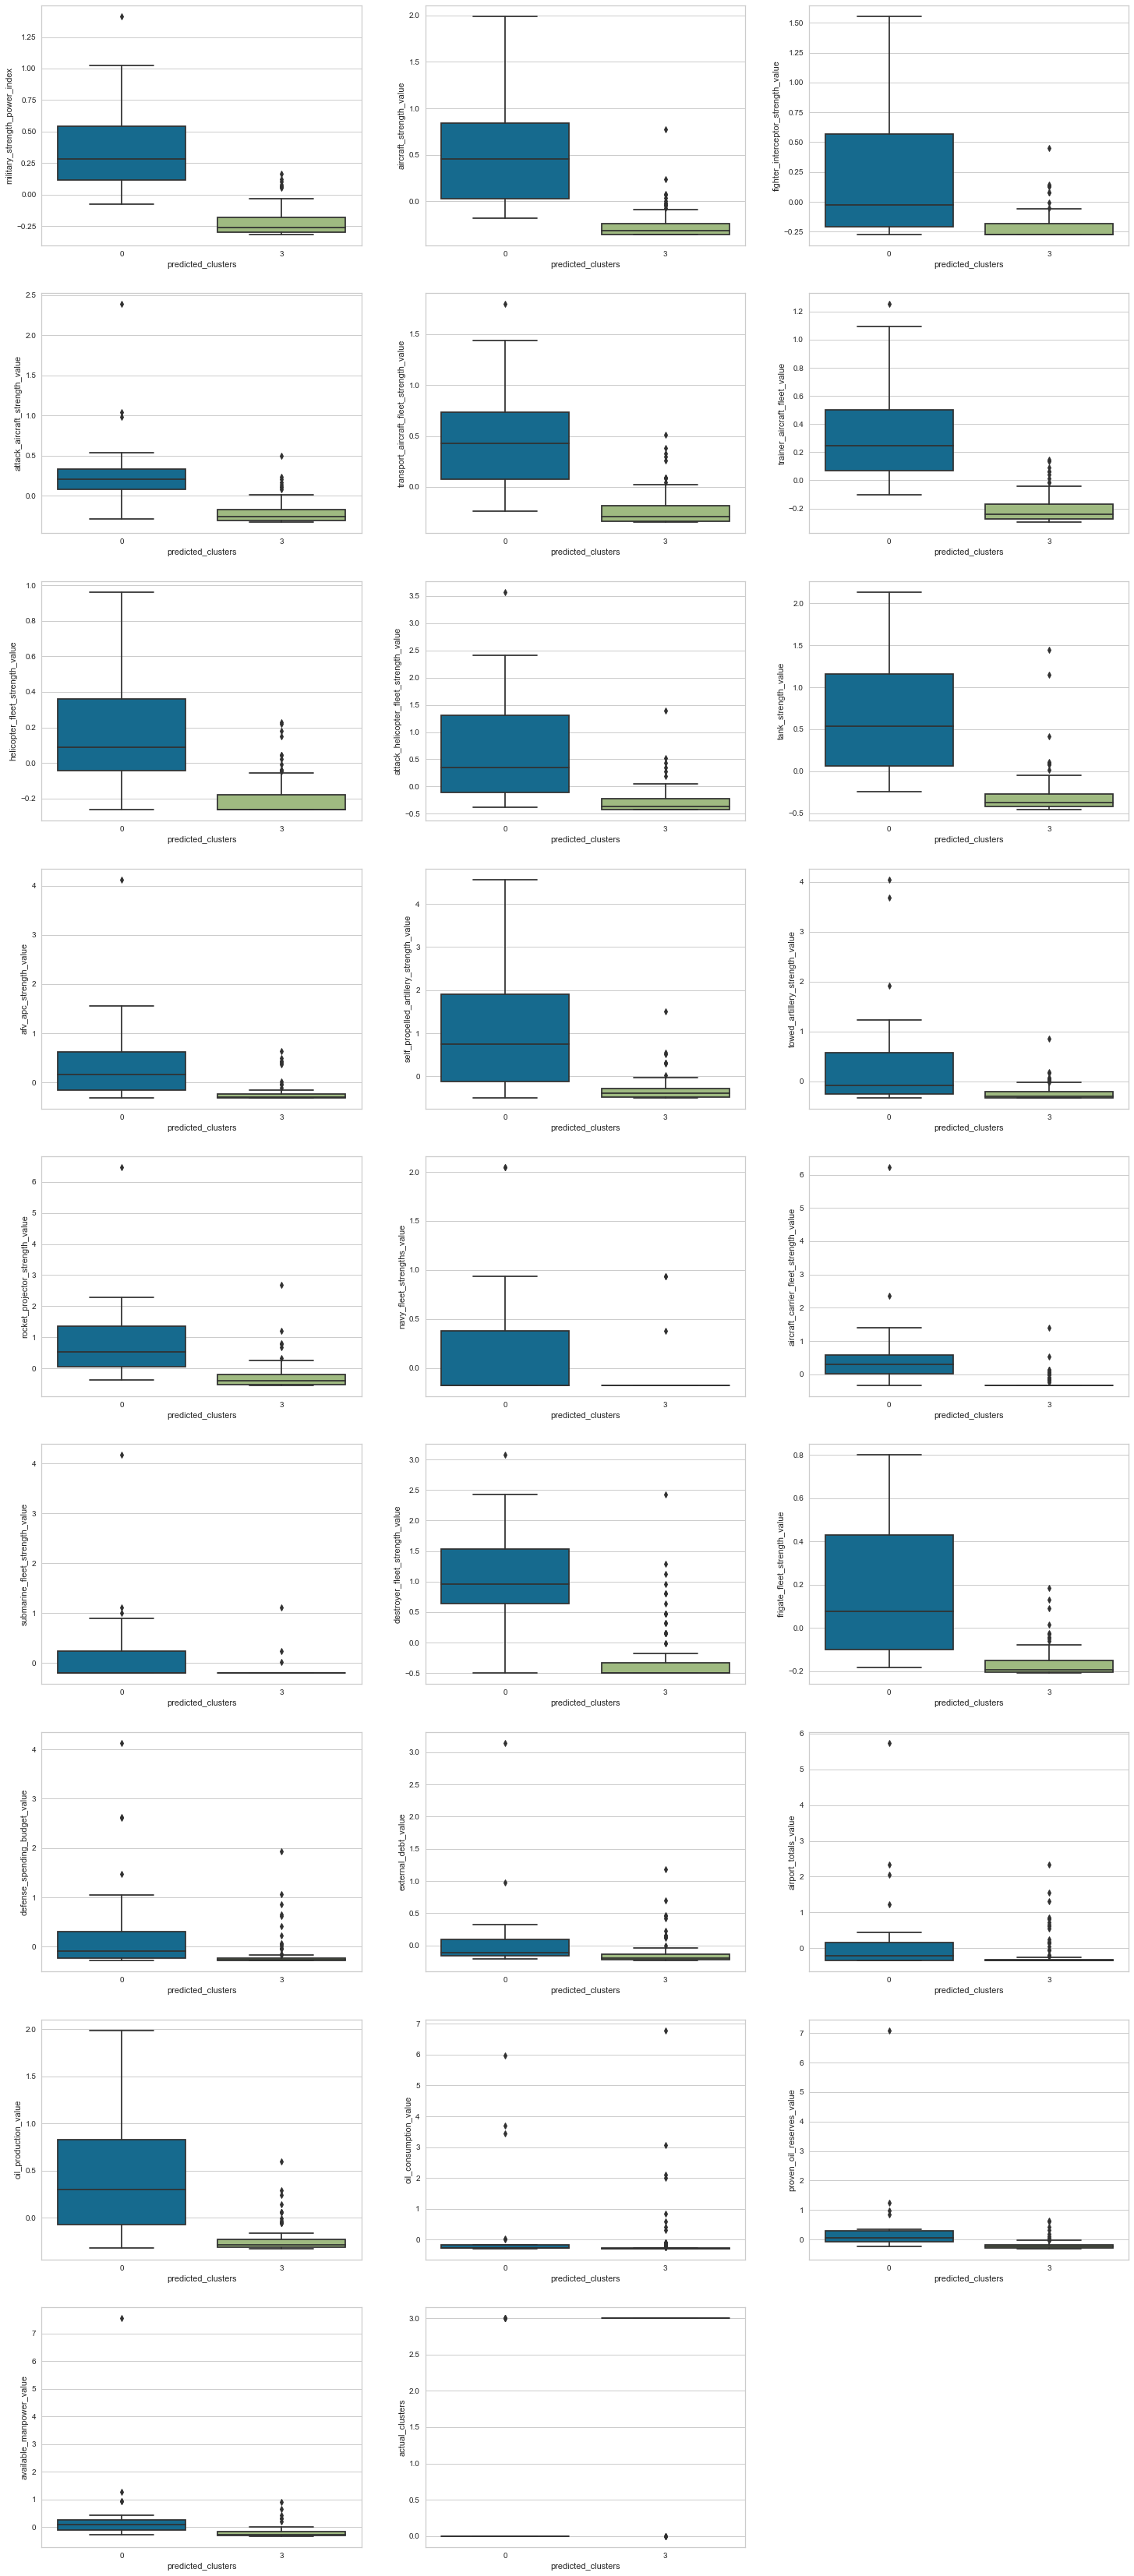

In [238]:
index = 0
plt.figure(figsize=(25, 60))
temp_df=df1.copy()
temp_df=temp_df.drop(["country",'predicted_clusters','actual_clusters','predicted_military_power'], axis=1)
scaler=scale
temp_df=pd.DataFrame(scaler(temp_df), columns=df1.columns[0:26])
temp_df['country']=df1['country']
temp_df["predicted_clusters"]=df1["predicted_clusters"]
temp_df["actual_clusters"]=df1["actual_clusters"]
temp_df=temp_df[(temp_df['predicted_clusters']==0 )| (temp_df['predicted_clusters']==3)]
for feature in temp_df.drop(["country"], axis=1):
    if feature != "predicted_clusters":
        index += 1
        plt.subplot(9, 3, index)
        sns.boxplot(x='predicted_clusters', y=feature, data=temp_df)

__Summary:__ The box plots are drawn for class label 0 and 3, which include errors in prediction. Class 3 has outliers and these values intercept with values in class 0. Moreover, in some cases, the box plot of two classes coincides. In order to eliminate 8 false prediction, the outliers should be revisited and some features could be dropped. But, this is costly and 8 failed prediction is acceptable in this clustering model.

## Hierarchical Clustering

In [333]:
df2 = df.copy()

In [334]:
df2.head().T

country                                     Afghanistan        Albania  \
military_strength_power_index                     1.344          2.314   
aircraft_strength_value                         260.000         19.000   
fighter_interceptor_strength_value                0.000          0.000   
attack_aircraft_strength_value                   25.000          0.000   
transport_aircraft_fleet_strength_value          30.000          0.000   
trainer_aircraft_fleet_value                      0.000          0.000   
helicopter_fleet_strength_value                 187.000         19.000   
attack_helicopter_fleet_strength_value            0.000          0.000   
tank_strength_value                               0.000          0.000   
afv_apc_strength_value                         1062.000        467.000   
self_propelled_artillery_strength_value           0.000          0.000   
towed_artillery_strength_value                  176.000          0.000   
rocket_projector_strength_value                  50.000          0.000   
navy_fleet_strengths_value                        0.000         38.000   
aircraft_carrier_fleet_strength_value             0.000          0.000   
submarine_fleet_strength_value                    0.000          0.000   
destroyer_fleet_strength_value                    0.000          0.000   
frigate_fleet_strength_value                      0.000          0.000   
defense_spending_budget_value           12000000000.000  250000000.000   
external_debt_value                      2840000000.000 9505000000.000   
airport_totals_value                             43.000          4.000   
oil_production_value                              0.000      16000.000   
oil_consumption_value                          5500.000      42500.000   
proven_oil_reserves_value                         0.000  168300000.000   
available_manpower_value                   14325743.000    1519438.000   
total_population_value                     34940837.000    3057220.000   

country                                         Algeria          Angola  \
military_strength_power_index                     0.466           0.838   
aircraft_strength_value                         551.000         295.000   
fighter_interceptor_strength_value              103.000          72.000   
attack_aircraft_strength_value                   22.000          18.000   
transport_aircraft_fleet_strength_value          59.000          30.000   
trainer_aircraft_fleet_value                     87.000          47.000   
helicopter_fleet_strength_value                 257.000         126.000   
attack_helicopter_fleet_strength_value           45.000          15.000   
tank_strength_value                             880.000         379.000   
afv_apc_strength_value                         7361.000         595.000   
self_propelled_artillery_strength_value         320.000          28.000   
towed_artillery_strength_value                  240.000         357.000   
rocket_projector_strength_value                 316.000         115.000   
navy_fleet_strengths_value                      201.000          57.000   
aircraft_carrier_fleet_strength_value             0.000           0.000   
submarine_fleet_strength_value                    6.000           0.000   
destroyer_fleet_strength_value                    0.000           0.000   
frigate_fleet_strength_value                      5.000           0.000   
defense_spending_budget_value           13000000000.000  7000000000.000   
external_debt_value                      6260000000.000 42080000000.000   
airport_totals_value                            157.000         176.000   
oil_production_value                        1306000.000     1666000.000   
oil_consumption_value                        325000.000       82300.000   
proven_oil_reserves_value               12200000000.000  8273000000.000   
available_manpower_value                   20741263.000     6244205.000   
total_population_value                     41657488

In [335]:
X_scaled = pd.DataFrame(scale(df2))
X_scaled.head().T

0      1      2      3      4
0  -0.088  0.647 -0.754 -0.472 -0.613
1  -0.105 -0.301  0.132 -0.076 -0.132
2  -0.355 -0.355  0.093 -0.042 -0.251
3  -0.008 -0.274 -0.040 -0.082 -0.199
4  -0.003 -0.329  0.313 -0.003 -0.231
5  -0.345 -0.345  0.017 -0.149 -0.078
6   0.064 -0.261  0.199 -0.054 -0.104
7  -0.264 -0.264  0.200 -0.110 -0.264
8  -0.428 -0.428  0.155 -0.177 -0.183
9  -0.264 -0.374  0.904 -0.351 -0.324
10 -0.309 -0.309  0.157 -0.269 -0.188
11 -0.272 -0.491 -0.192 -0.046 -0.276
12 -0.222 -0.325  0.330 -0.087 -0.271
13 -0.544 -0.273  0.888 -0.138 -0.195
14 -0.177 -0.177 -0.177 -0.177 -0.177
15 -0.328 -0.328  0.145 -0.328 -0.170
16 -0.196 -0.196 -0.196 -0.196  0.240
17 -0.497 -0.497  0.314 -0.497 -0.497
18 -0.030 -0.205 -0.015 -0.104 -0.146
19 -0.281 -0.277 -0.279 -0.259 -0.165
20 -0.204 -0.237 -0.110 -0.094  0.702
21 -0.353 -0.343  0.434  0.650 -0.064
22 -0.322 -0.305 -0.174 -0.287 -0.008
23 -0.280 -0.276  0.006 -0.086 -0.229
24 -0.132 -0.284 -0.056 -0.228 -0.063
25 -0.111 -0.305 -0.070 -0.139 -0.052

In [336]:
from pyclustertend import hopkins
hopkins(X_scaled, X.shape[0])

0.07631202642385913

### Dendogram

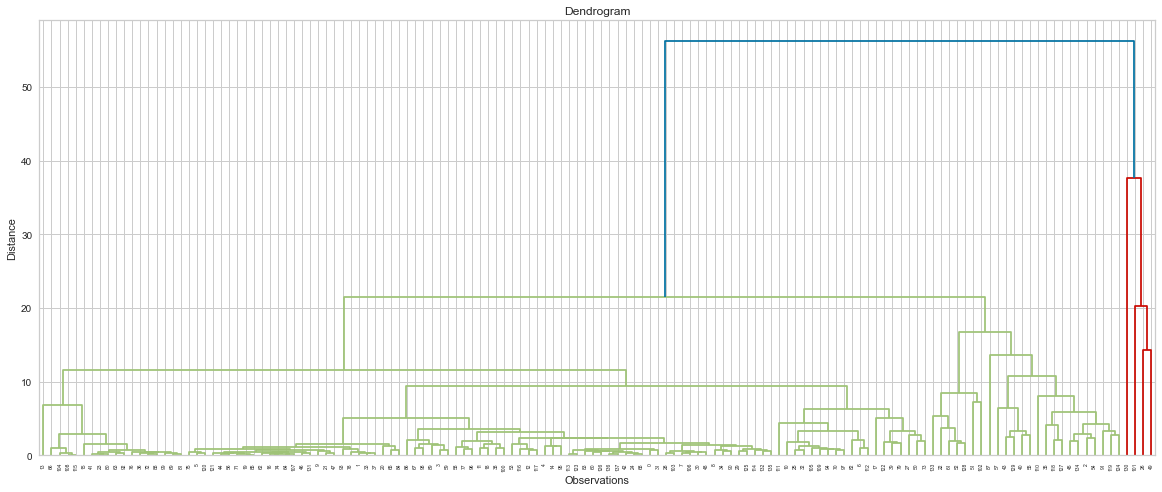

In [337]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(linkage(X_scaled, method = "ward"), leaf_font_size = 5);

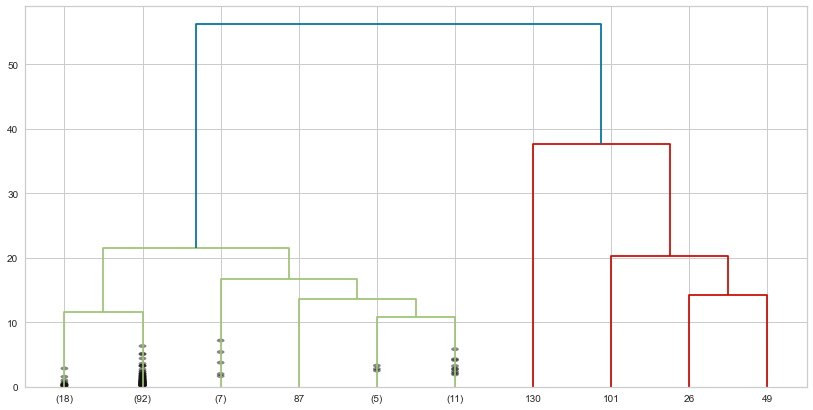

In [338]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

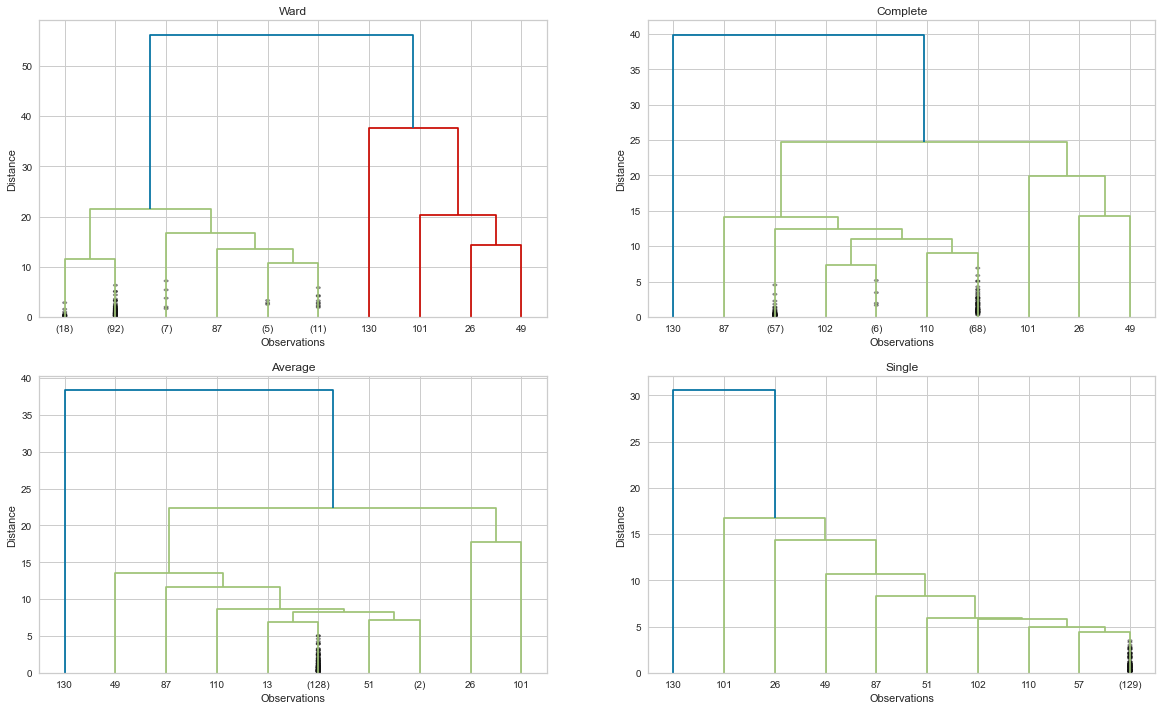

In [339]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### Model Building and label visualisation

In [340]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2, 10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                    affinity='euclidean', 
                                    linkage='ward').fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model_labels)}')

Silhouette Score for 2 clusters: 0.845399838713613
Silhouette Score for 3 clusters: 0.8175531660446754
Silhouette Score for 4 clusters: 0.5029938446779337
Silhouette Score for 5 clusters: 0.5032647904005031
Silhouette Score for 6 clusters: 0.5116444743428034
Silhouette Score for 7 clusters: 0.5111946552668103
Silhouette Score for 8 clusters: 0.49400590548341033
Silhouette Score for 9 clusters: 0.2652862033211853


In [341]:
model_labels = AgglomerativeClustering(n_clusters = 4,  
                                affinity='euclidean', 
                                linkage='ward').fit_predict(X_scaled)
clusters = model_labels
clusters

array([3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 3, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [342]:
df2["predicted_clusters_hc"] = clusters

In [343]:
df2.head().T

country                                     Afghanistan        Albania  \
military_strength_power_index                     1.344          2.314   
aircraft_strength_value                         260.000         19.000   
fighter_interceptor_strength_value                0.000          0.000   
attack_aircraft_strength_value                   25.000          0.000   
transport_aircraft_fleet_strength_value          30.000          0.000   
trainer_aircraft_fleet_value                      0.000          0.000   
helicopter_fleet_strength_value                 187.000         19.000   
attack_helicopter_fleet_strength_value            0.000          0.000   
tank_strength_value                               0.000          0.000   
afv_apc_strength_value                         1062.000        467.000   
self_propelled_artillery_strength_value           0.000          0.000   
towed_artillery_strength_value                  176.000          0.000   
rocket_projector_strength_value                  50.000          0.000   
navy_fleet_strengths_value                        0.000         38.000   
aircraft_carrier_fleet_strength_value             0.000          0.000   
submarine_fleet_strength_value                    0.000          0.000   
destroyer_fleet_strength_value                    0.000          0.000   
frigate_fleet_strength_value                      0.000          0.000   
defense_spending_budget_value           12000000000.000  250000000.000   
external_debt_value                      2840000000.000 9505000000.000   
airport_totals_value                             43.000          4.000   
oil_production_value                              0.000      16000.000   
oil_consumption_value                          5500.000      42500.000   
proven_oil_reserves_value                         0.000  168300000.000   
available_manpower_value                   14325743.000    1519438.000   
total_population_value                     34940837.000    3057220.000   
predicted_clusters_hc                             3.000          3.000   

country                                         Algeria          Angola  \
military_strength_power_index                     0.466           0.838   
aircraft_strength_value                         551.000         295.000   
fighter_interceptor_strength_value              103.000          72.000   
attack_aircraft_strength_value                   22.000          18.000   
transport_aircraft_fleet_strength_value          59.000          30.000   
trainer_aircraft_fleet_value                     87.000          47.000   
helicopter_fleet_strength_value                 257.000         126.000   
attack_helicopter_fleet_strength_value           45.000          15.000   
tank_strength_value                             880.000         379.000   
afv_apc_strength_value                         7361.000         595.000   
self_propelled_artillery_strength_value         320.000          28.000   
towed_artillery_strength_value                  240.000         357.000   
rocket_projector_strength_value                 316.000         115.000   
navy_fleet_strengths_value                      201.000          57.000   
aircraft_carrier_fleet_strength_value             0.000           0.000   
submarine_fleet_strength_value                    6.000           0.000   
destroyer_fleet_strength_value                    0.000           0.000   
frigate_fleet_strength_value                      5.000           0.000   
defense_spending_budget_value           13000000000.000  7000000000.000   
external_debt_value                      6260000000.000 42080000000.000   
airport_totals_value                            157.000         176.000   
oil_production_value                        1306000.000     1666000.000   
oil_consumption_value                        325000.000       82300.000   
proven_oil_reserves_value               12200000000.000  8273000000.000   
available_manpower_value                   20741263.

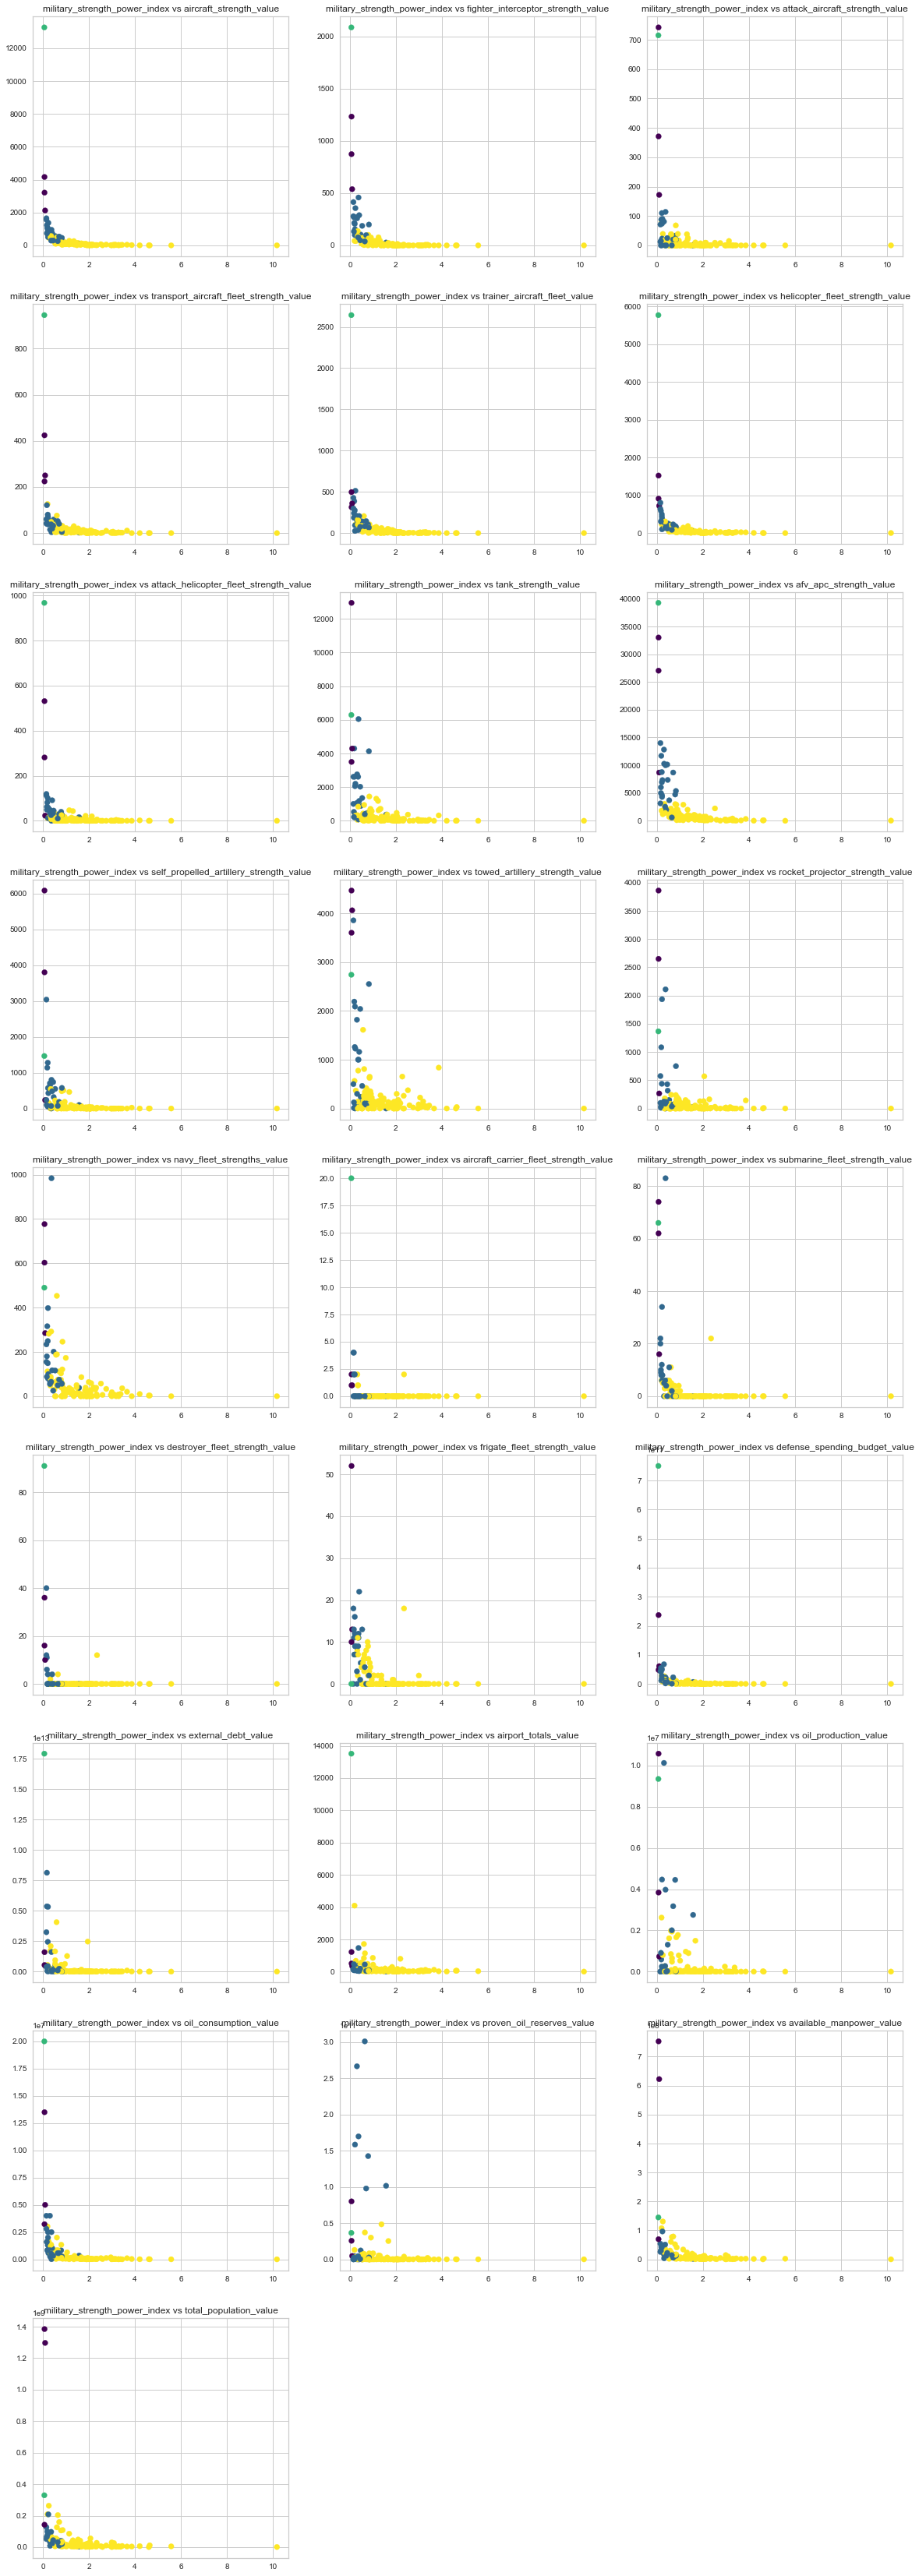

In [277]:
plt.figure(figsize = (20,60))
for idx in range(1,26):
    plt.subplot(9,3,idx)
    title=df2.columns[0]+" vs "+df2.columns[idx]
    plt.title(title)
    plt.scatter(df2.iloc[:,0], df2.iloc[:,idx], c = clusters, cmap = "viridis");


In [344]:
df2.predicted_clusters_hc.value_counts()

3    110
1     24
0      3
2      1
Name: predicted_clusters_hc, dtype: int64

In [280]:
df2[df2["predicted_clusters_hc"]==0].index

Index(['China', 'India', 'Russia'], dtype='object', name='country')

In [284]:
df2[df2["predicted_clusters_hc"]==1].index

Index(['Algeria', 'Canada', 'Egypt', 'France', 'Germany', 'Greece', 'Iran',
       'Iraq', 'Israel', 'Italy', 'Japan', 'Kuwait', 'North Korea', 'Pakistan',
       'Saudi Arabia', 'South Korea', 'Syria', 'Taiwan', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'Venezuela', 'Vietnam'],
      dtype='object', name='country')

In [282]:
df2[df2["predicted_clusters_hc"]==2].index

Index(['United States'], dtype='object', name='country')

In [283]:
df2[df2["predicted_clusters_hc"]==3].index

Index(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Tanzania', 'Thailand', 'Tunisia', 'Turkmenistan', 'Uganda', 'Uruguay',
       'Uzbekistan', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=110)

__Summary:__ In this model, United States is one cluster like in K-Means Model. But, previously China and Russia has formed a cluster. This time India is added to this class. Also, another class with 110 members in this model is smaller than previous model by only two members. Therefore, the last class has only one more member with respect to K-Means.

### Evaluate 

In [345]:
df2["military_power"] = df2["predicted_clusters_hc"].map({  0 : "more powerful",
                                                            1 : "powerful",
                                                            2 : "most powerful",
                                                            3 : "weak",
                                                         })

In [346]:
df2.head().T

country                                     Afghanistan        Albania  \
military_strength_power_index                     1.344          2.314   
aircraft_strength_value                         260.000         19.000   
fighter_interceptor_strength_value                0.000          0.000   
attack_aircraft_strength_value                   25.000          0.000   
transport_aircraft_fleet_strength_value          30.000          0.000   
trainer_aircraft_fleet_value                      0.000          0.000   
helicopter_fleet_strength_value                 187.000         19.000   
attack_helicopter_fleet_strength_value            0.000          0.000   
tank_strength_value                               0.000          0.000   
afv_apc_strength_value                         1062.000        467.000   
self_propelled_artillery_strength_value           0.000          0.000   
towed_artillery_strength_value                  176.000          0.000   
rocket_projector_strength_value                  50.000          0.000   
navy_fleet_strengths_value                        0.000         38.000   
aircraft_carrier_fleet_strength_value             0.000          0.000   
submarine_fleet_strength_value                    0.000          0.000   
destroyer_fleet_strength_value                    0.000          0.000   
frigate_fleet_strength_value                      0.000          0.000   
defense_spending_budget_value           12000000000.000  250000000.000   
external_debt_value                      2840000000.000 9505000000.000   
airport_totals_value                             43.000          4.000   
oil_production_value                              0.000      16000.000   
oil_consumption_value                          5500.000      42500.000   
proven_oil_reserves_value                         0.000  168300000.000   
available_manpower_value                   14325743.000    1519438.000   
total_population_value                     34940837.000    3057220.000   
predicted_clusters_hc                                 3              3   
military_power                                     weak           weak   

country                                         Algeria          Angola  \
military_strength_power_index                     0.466           0.838   
aircraft_strength_value                         551.000         295.000   
fighter_interceptor_strength_value              103.000          72.000   
attack_aircraft_strength_value                   22.000          18.000   
transport_aircraft_fleet_strength_value          59.000          30.000   
trainer_aircraft_fleet_value                     87.000          47.000   
helicopter_fleet_strength_value                 257.000         126.000   
attack_helicopter_fleet_strength_value           45.000          15.000   
tank_strength_value                             880.000         379.000   
afv_apc_strength_value                         7361.000         595.000   
self_propelled_artillery_strength_value         320.000          28.000   
towed_artillery_strength_value                  240.000         357.000   
rocket_projector_strength_value                 316.000         115.000   
navy_fleet_strengths_value                      201.000          57.000   
aircraft_carrier_fleet_strength_value             0.000           0.000   
submarine_fleet_strength_value                    6.000           0.000   
destroyer_fleet_strength_value                    0.000           0.000   
frigate_fleet_strength_value                      5.000           0.000   
defense_spending_budget_value           13000000000.000  7000000000.000   
external_debt_value                      6260000000.000 42080000000.000   
airport_totals_value                            157.000         176.000   
oil_production_value                        1306000.000     1666000.000   
oil_consumption_value                        325000.000       82300.000   
proven_oil_reserves_value               12200000000.0

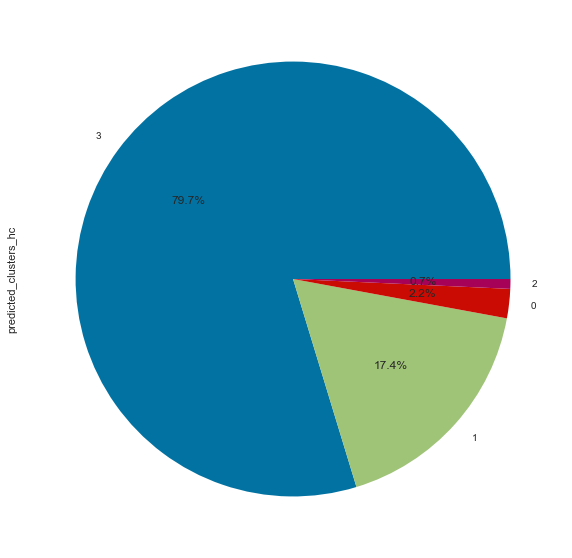

In [312]:
df2["predicted_clusters_hc"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

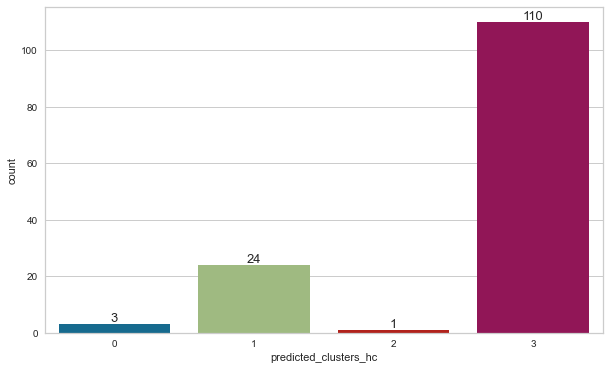

In [313]:
df2.predicted_clusters_hc.value_counts()

sns.countplot(x=df2["predicted_clusters_hc"], data=df2)
for index,value in enumerate(df2.predicted_clusters_hc.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [348]:
df2["military_power"].value_counts()

weak             110
powerful          24
more powerful      3
most powerful      1
Name: military_power, dtype: int64

In [316]:
df2.groupby("military_power")["country"].unique()["weak"]

array(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Chile', 'Colombia', 'Croatia', 'Cuba', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia',
       'Ethiopia', 'Finland', 'Gabon', 'Georgia', 'Ghana', 'Guatemala',
       'Honduras', 'Hungary', 'Indonesia', 'Ireland', 'Ivory Coast',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Latvia',
       'Lebanon', 'Liberia', 'Libya', 'Lithuania', 'Madagascar',
       'Malaysia', 'Mali', 'Mauritania', 'Mexico', 'Moldova', 'Mongolia',
       'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia',
       'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger

In [317]:
df2.groupby("military_power")["country"].unique()["powerful"]

array(['Algeria', 'Canada', 'Egypt', 'France', 'Germany', 'Greece',
       'Iran', 'Iraq', 'Israel', 'Italy', 'Japan', 'Kuwait',
       'North Korea', 'Pakistan', 'Saudi Arabia', 'South Korea', 'Syria',
       'Taiwan', 'Turkey', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'Venezuela', 'Vietnam'], dtype=object)

In [318]:
df2.groupby("military_power")["country"].unique()["more powerful"]

array(['China', 'India', 'Russia'], dtype=object)

In [319]:
df2.groupby("military_power")["country"].unique()["most powerful"]

array(['United States'], dtype=object)

In [326]:
df2['military_strength_power_index'].iplot(kind='hist', bins=200)

In [327]:
df1.head().T

0                1  \
country                                      United States           Russia   
military_strength_power_index                        0.061            0.068   
aircraft_strength_value                          13264.000         4163.000   
fighter_interceptor_strength_value                2085.000          873.000   
attack_aircraft_strength_value                     715.000          742.000   
transport_aircraft_fleet_strength_value            945.000          424.000   
trainer_aircraft_fleet_value                      2643.000          497.000   
helicopter_fleet_strength_value                   5768.000         1522.000   
attack_helicopter_fleet_strength_value             967.000          531.000   
tank_strength_value                               6289.000        12950.000   
afv_apc_strength_value                           39253.000        27038.000   
self_propelled_artillery_strength_value           1465.000         6083.000   
towed_artillery_strength_value                    2740.000         4465.000   
rocket_projector_strength_value                   1366.000         3860.000   
navy_fleet_strengths_value                         490.000          603.000   
aircraft_carrier_fleet_strength_value               20.000            1.000   
submarine_fleet_strength_value                      66.000           62.000   
destroyer_fleet_strength_value                      91.000           16.000   
frigate_fleet_strength_value                         0.000           10.000   
defense_spending_budget_value             750000000000.000  48000000000.000   
external_debt_value                     17910000000000.000 539600000000.000   
airport_totals_value                             13513.000         1218.000   
oil_production_value                           9352000.000     10580000.000   
oil_consumption_value                         20000000.000      3225000.000   
proven_oil_reserves_value                  36520000000.000  80000000000.000   
available_manpower_value                     144872845.000     69640160.000   
total_population_value                       329256465.000    142122776.000   
predicted_clusters                                       2                1   
actual_clusters                                      2.000            1.000   
predicted_military_power                     most_powerful   more_powerfull   

                                                        2                3  \
country                                             China            India   
military_strength_power_index                       0.069            0.095   
aircraft_strength_value                          3210.000         2123.000   
fighter_interceptor_strength_value               1232.000          538.000   
attack_aircraft_strength_value                    371.000          172.000   
transport_aircraft_fleet_strength_value           224.000          250.000   
trainer_aircraft_fleet_value                      314.000          359.000   
helicopter_fleet_strength_value                   911.000          722.000   
attack_helicopter_fleet_strength_value            281.000           23.000   
tank_strength_value                              3500.000         4292.000   
afv_apc_strength_value                          33000.000         8686.000   
self_propelled_artillery_strength_value          3800.000          235.000   
towed_artillery_strength_value                   3600.000         4060.000   
rocket_projector_strength_value                  2650.000          266.000   
navy_fleet_strengths_value                        777.000          285.000   
aircraft_carrier_fleet_strength_value               2.000            1.000   
submarine_fleet_strength_value                     74.000           16.000   
destroyer_fleet_strength_value                     36.000           10.000   
frigate_fleet_strength_value                       52.000           13.000   
defense_spending_budget_value            237000

In [349]:
#sort dataframe with ascending order of military power index
df2.sort_values(by="military_strength_power_index", inplace=True)
df2.reset_index(inplace=True)
df2.head().T

0                1  \
country                                      United States           Russia   
military_strength_power_index                        0.061            0.068   
aircraft_strength_value                          13264.000         4163.000   
fighter_interceptor_strength_value                2085.000          873.000   
attack_aircraft_strength_value                     715.000          742.000   
transport_aircraft_fleet_strength_value            945.000          424.000   
trainer_aircraft_fleet_value                      2643.000          497.000   
helicopter_fleet_strength_value                   5768.000         1522.000   
attack_helicopter_fleet_strength_value             967.000          531.000   
tank_strength_value                               6289.000        12950.000   
afv_apc_strength_value                           39253.000        27038.000   
self_propelled_artillery_strength_value           1465.000         6083.000   
towed_artillery_strength_value                    2740.000         4465.000   
rocket_projector_strength_value                   1366.000         3860.000   
navy_fleet_strengths_value                         490.000          603.000   
aircraft_carrier_fleet_strength_value               20.000            1.000   
submarine_fleet_strength_value                      66.000           62.000   
destroyer_fleet_strength_value                      91.000           16.000   
frigate_fleet_strength_value                         0.000           10.000   
defense_spending_budget_value             750000000000.000  48000000000.000   
external_debt_value                     17910000000000.000 539600000000.000   
airport_totals_value                             13513.000         1218.000   
oil_production_value                           9352000.000     10580000.000   
oil_consumption_value                         20000000.000      3225000.000   
proven_oil_reserves_value                  36520000000.000  80000000000.000   
available_manpower_value                     144872845.000     69640160.000   
total_population_value                       329256465.000    142122776.000   
predicted_clusters_hc                                    2                0   
military_power                               most powerful    more powerful   

                                                        2                3  \
country                                             China            India   
military_strength_power_index                       0.069            0.095   
aircraft_strength_value                          3210.000         2123.000   
fighter_interceptor_strength_value               1232.000          538.000   
attack_aircraft_strength_value                    371.000          172.000   
transport_aircraft_fleet_strength_value           224.000          250.000   
trainer_aircraft_fleet_value                      314.000          359.000   
helicopter_fleet_strength_value                   911.000          722.000   
attack_helicopter_fleet_strength_value            281.000           23.000   
tank_strength_value                              3500.000         4292.000   
afv_apc_strength_value                          33000.000         8686.000   
self_propelled_artillery_strength_value          3800.000          235.000   
towed_artillery_strength_value                   3600.000         4060.000   
rocket_projector_strength_value                  2650.000          266.000   
navy_fleet_strengths_value                        777.000          285.000   
aircraft_carrier_fleet_strength_value               2.000            1.000   
submarine_fleet_strength_value                     74.000           16.000   
destroyer_fleet_strength_value                     36.000           10.000   
frigate_fleet_strength_value                       52.000           13.000   
defense_spending_budget_value            237000000000.000  61000000000.000   
external_debt_value                     15980000

In [353]:
(df2.predicted_clusters_hc==df1.predicted_clusters).sum()

109

In [355]:
df1[df2.predicted_clusters_hc!=df1.predicted_clusters]['country']

1                   Russia
2                    China
4                    Japan
5              South Korea
6                   France
7           United Kingdom
8                    Egypt
9                   Brazil
10                  Turkey
11                   Italy
12                 Germany
13                    Iran
14                Pakistan
15               Indonesia
16            Saudi Arabia
17                  Israel
21                 Vietnam
22                Thailand
23                  Canada
24             North Korea
25                  Taiwan
26                 Ukraine
27                 Algeria
32                  Greece
40               Venezuela
44    United Arab Emirates
49                    Iraq
54                   Syria
84                  Kuwait
Name: country, dtype: object

__Summary:__ 29 countries' clusters are different in HC and K-Means